In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [29]:
# Read in data
df_train = pd.read_csv("train.csv", index_col = 0)
df_test = pd.read_csv("test.csv", index_col = 0)

In [30]:
# Get dimensions of data
print "Train: %d rows, %d columns" % (df_train.shape[0], df_train.shape[1])
print "Test: %d rows, %d columns" % (df_test.shape[0], df_test.shape[1])

Train: 1460 rows, 80 columns
Test: 1459 rows, 79 columns


In [31]:
# Describe the Sale Price target variable
print df_train['SalePrice'].describe()

# Count nulls in target variable
print "Number of nulls: %d" % (np.sum(df_train['SalePrice'].isnull()))

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Number of nulls: 0


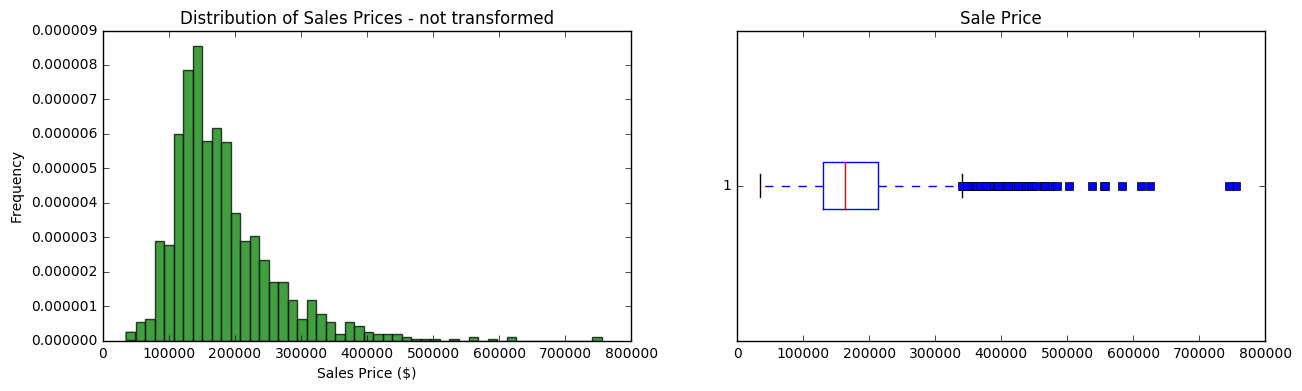

In [5]:
fig = plt.figure(1)

# Plot distribution of target variable - SalePrice
plt.subplot(121)
plt.hist(df_train.SalePrice, 50, normed=1, facecolor='green', alpha=0.75)
plt.xlabel("Sales Price ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Sales Prices - not transformed")

plt.subplot(122)
# Plot boxplot of SalePrice to see outliers
plt.boxplot(df_train["SalePrice"].values,0,'rs',0)
plt.title("Sale Price")

fig.set_figwidth(15)
plt.show()

In [33]:
from scipy.stats import skew
print skew(df_train["SalePrice"].dropna())
print skew(np.log(df_train["SalePrice"].dropna()+1))

1.88094074603
0.121221913115


It looks like the Sale Price target variable is right, skewed so we will perform a variable transformation to make it a better fit for the regression models we will apply soon.

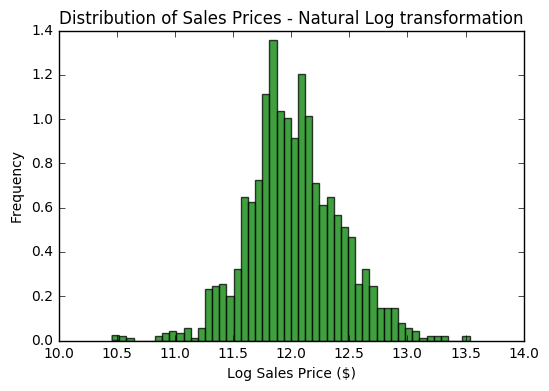

In [6]:
# Try out a log transformation and test for normality
df_train['log_SalePrice'] = df_train['SalePrice'].apply(lambda x: np.log(x))

plt.hist(df_train.log_SalePrice, 50, normed=1, facecolor='green', alpha=0.75)
plt.xlabel("Log Sales Price ($)")
plt.ylabel("Frequency")
plt.title("Distribution of Sales Prices - Natural Log transformation")

plt.show()

The natural log transformation seems to have made the target variable approximately normal, so our regression models will be valid.

In [7]:
# See impact of all categorical variables on Sale price using bar plots

qual_vars =  df_train.select_dtypes(include = ['object']).columns
print "Number of categorical variables: %d" % len(qual_vars)

# Add in the target variable to the list for indexing
var_list = [col for col in df_train.columns if col in qual_vars or col == 'log_SalePrice']

df_qual = df_train.loc[:,var_list]
print len(df_qual.columns)

Number of categorical variables: 43
44


In [21]:
def plotGraph(grp, col, df):
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(5)
    grp = df_train.groupby(col)['SalePrice'].mean()
    grp.plot(kind = "bar", title = col)
    return fig

C:\Users\Owner\Anaconda2\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


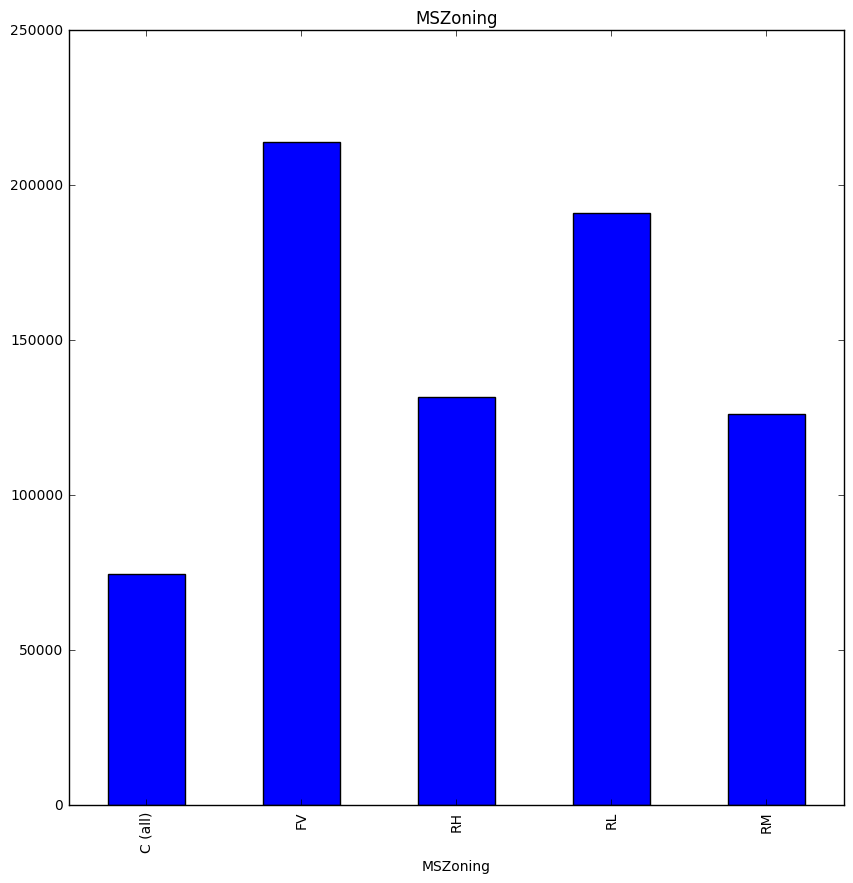

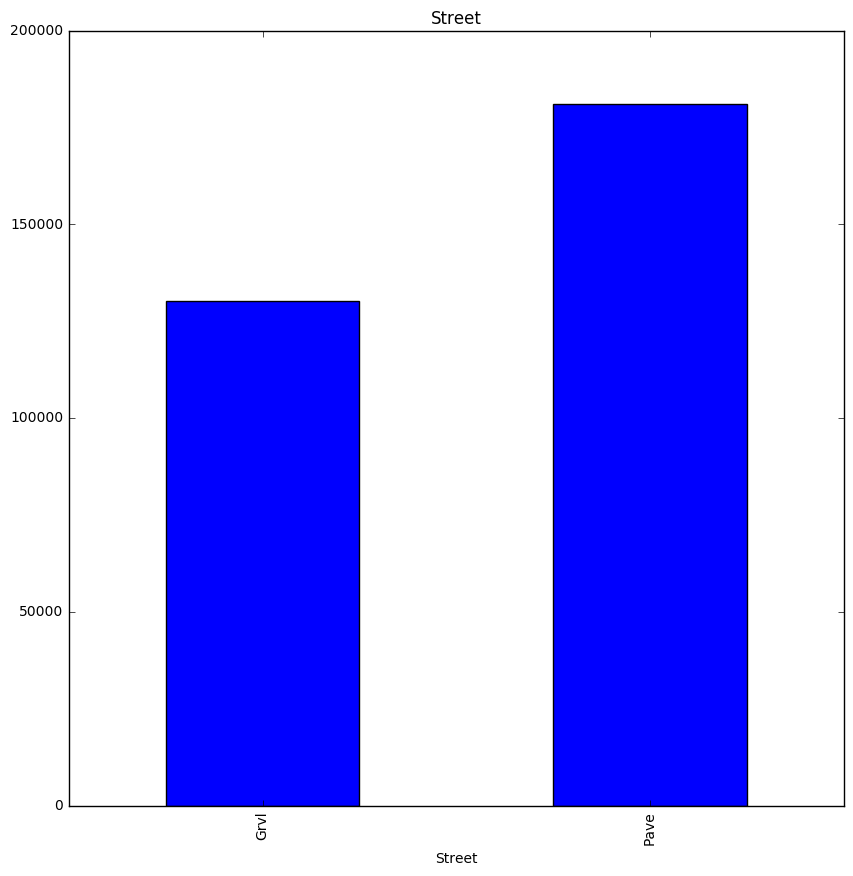

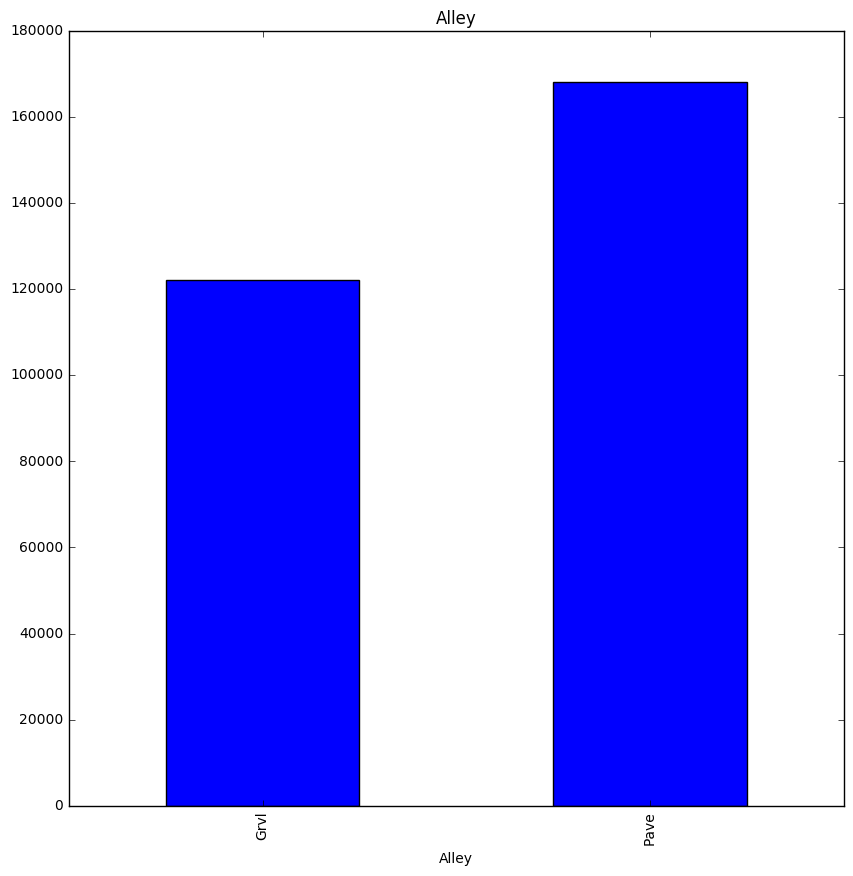

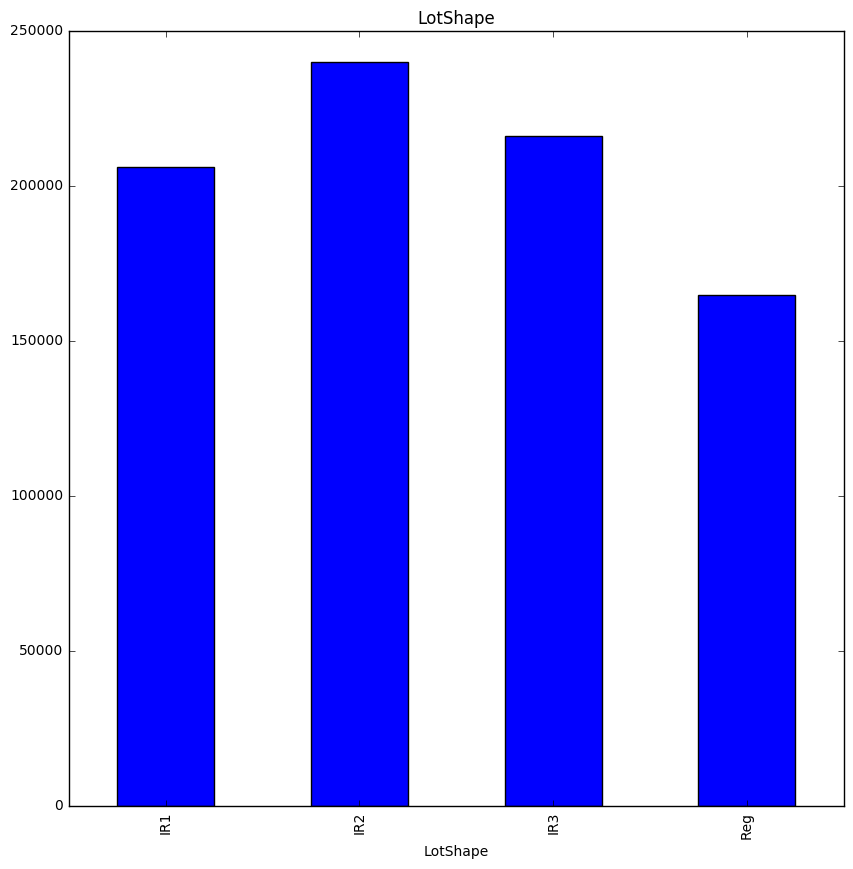

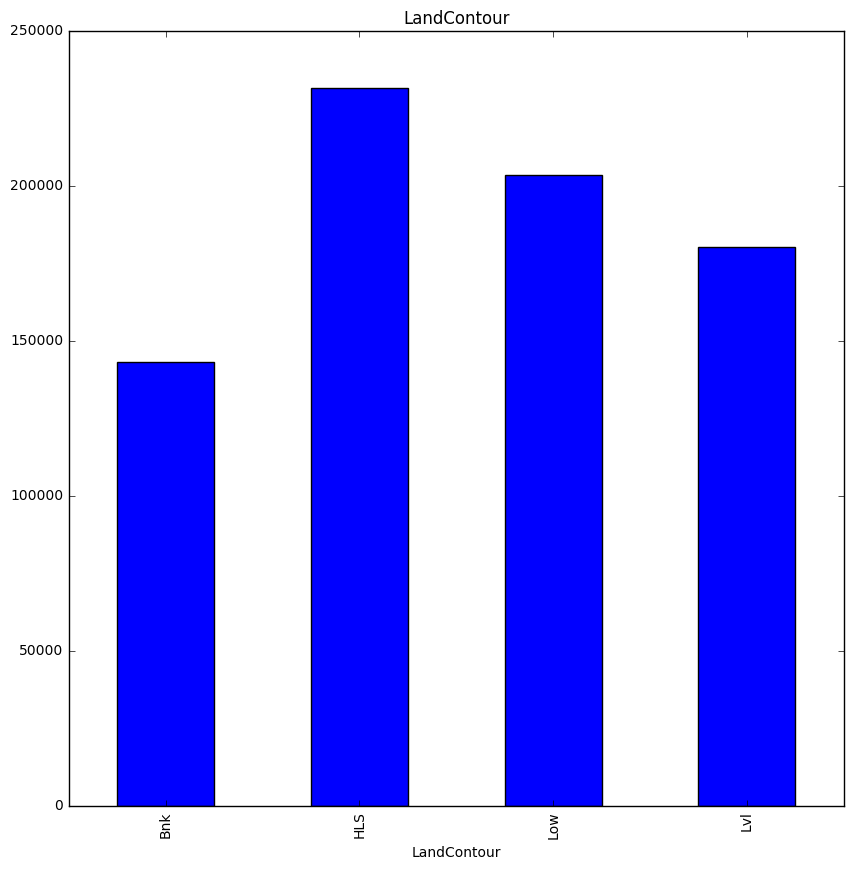

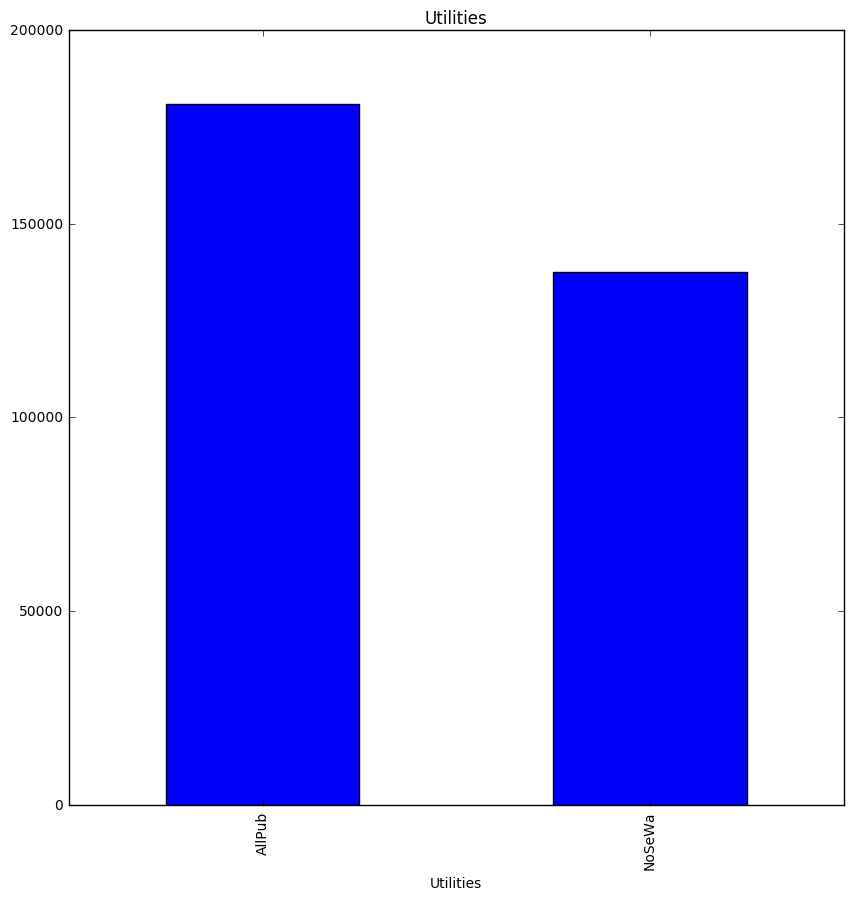

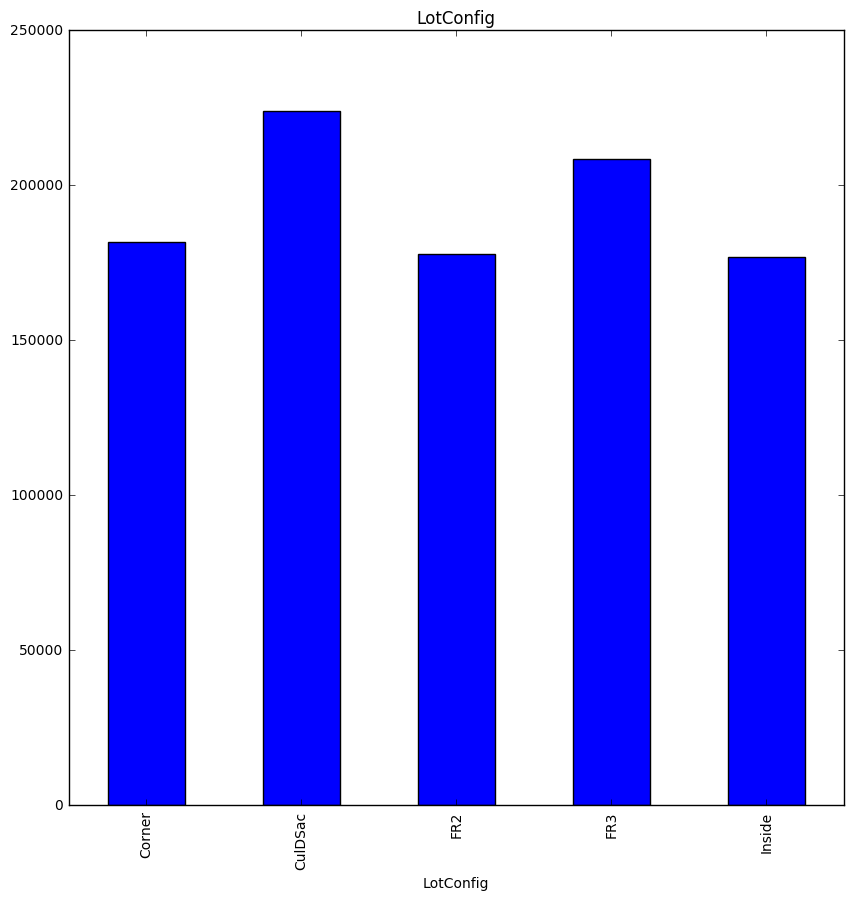

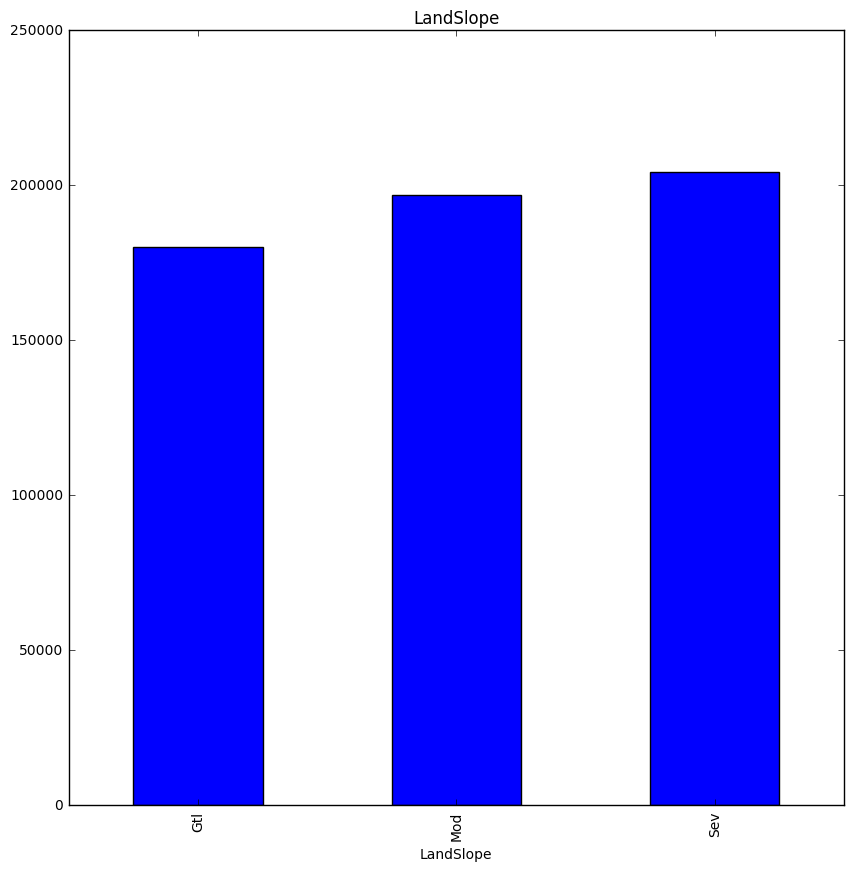

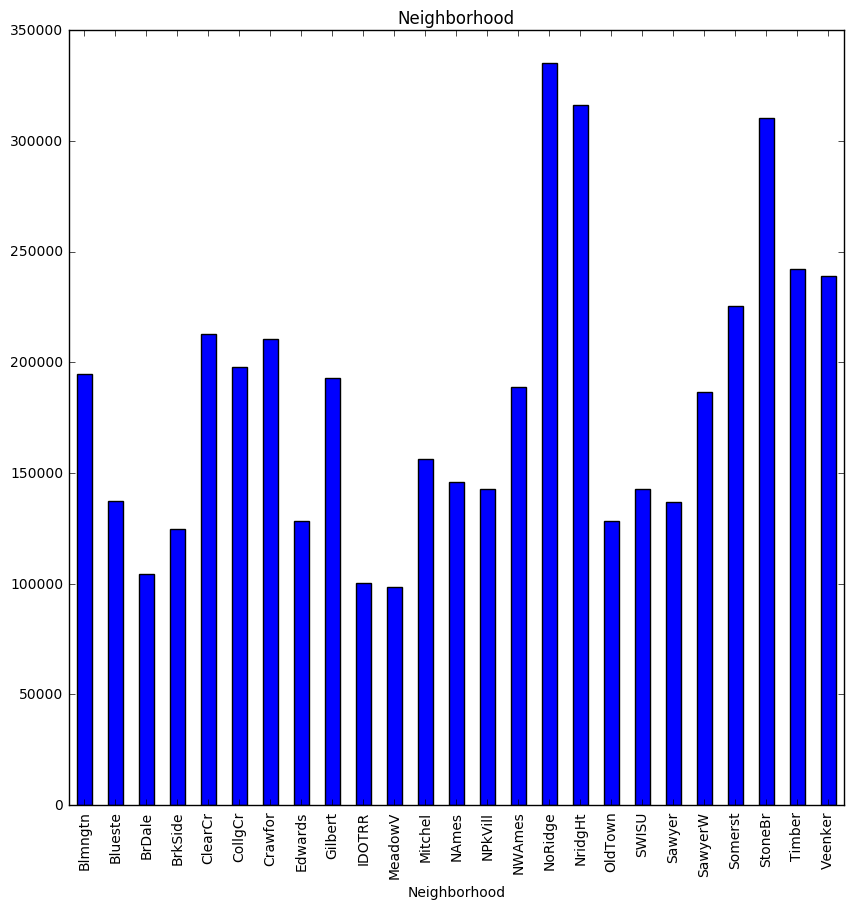

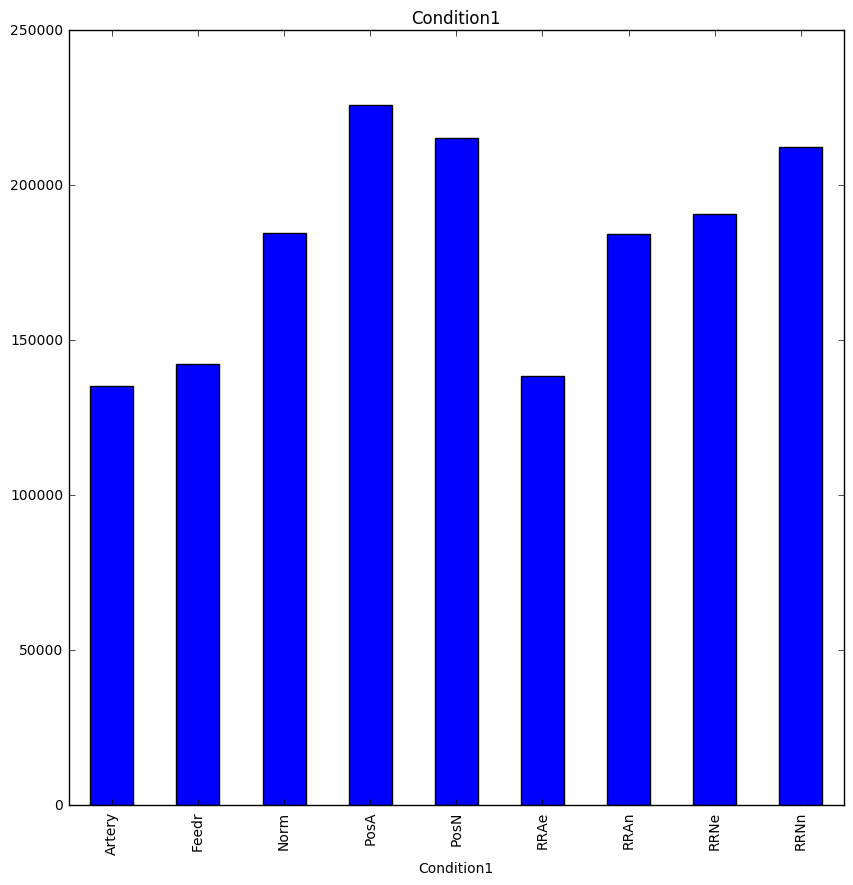

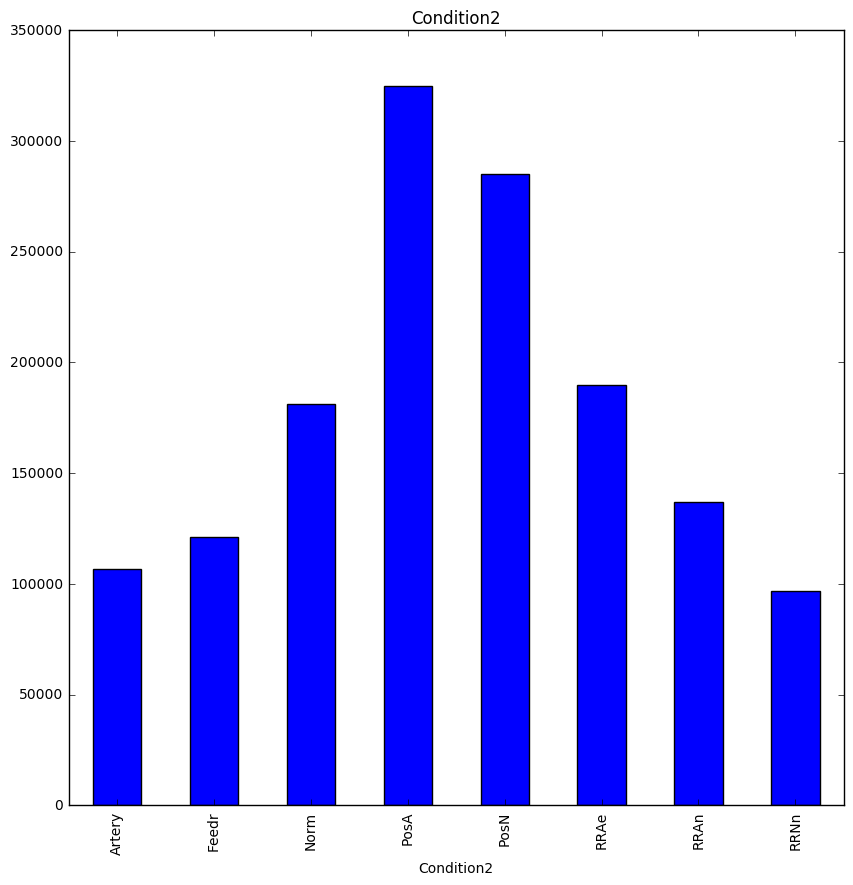

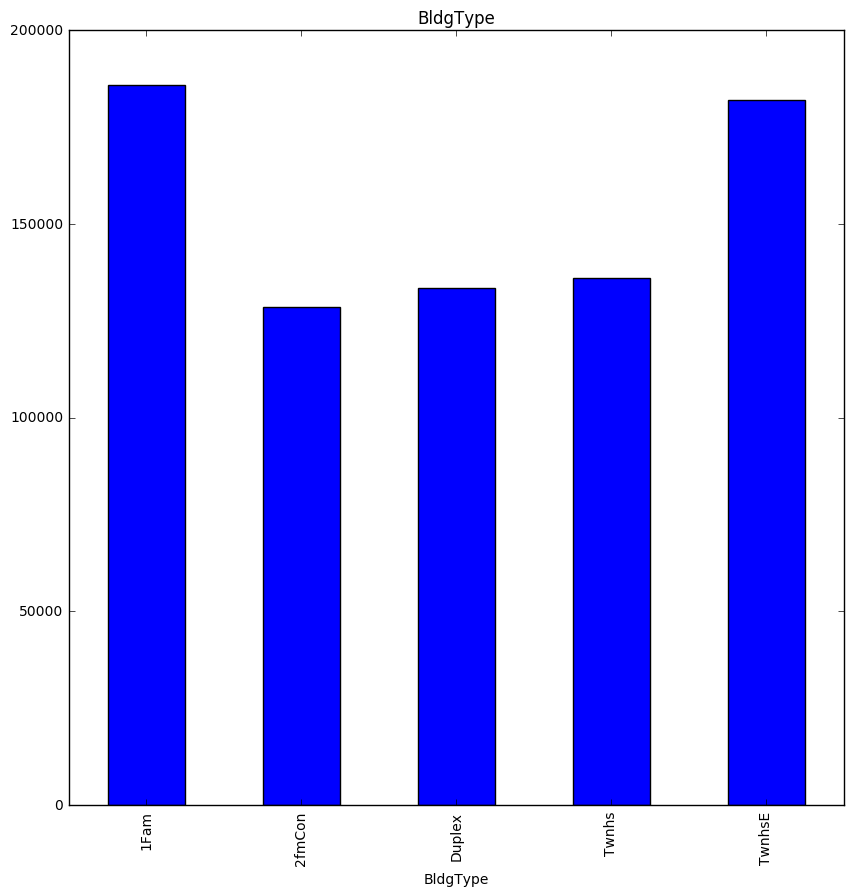

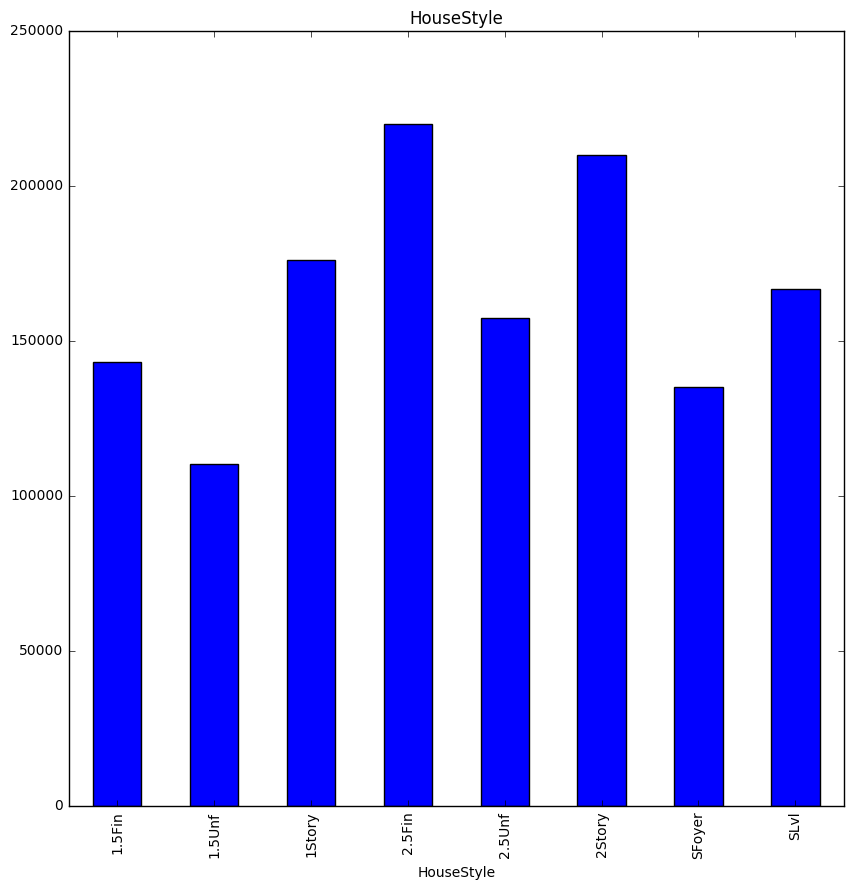

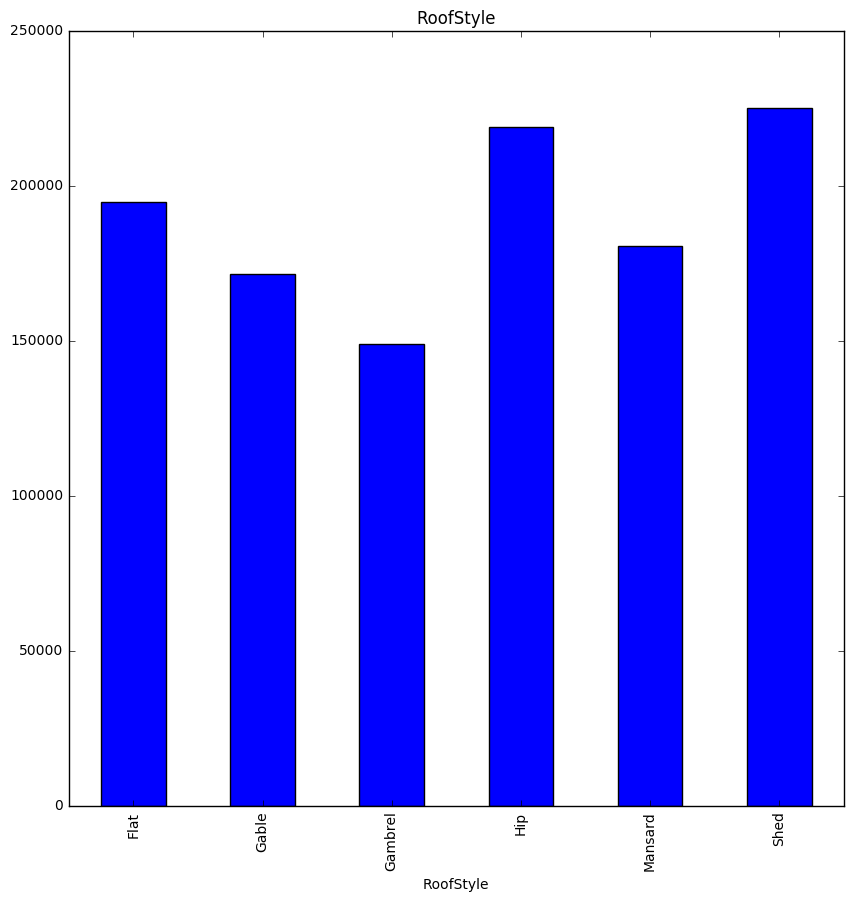

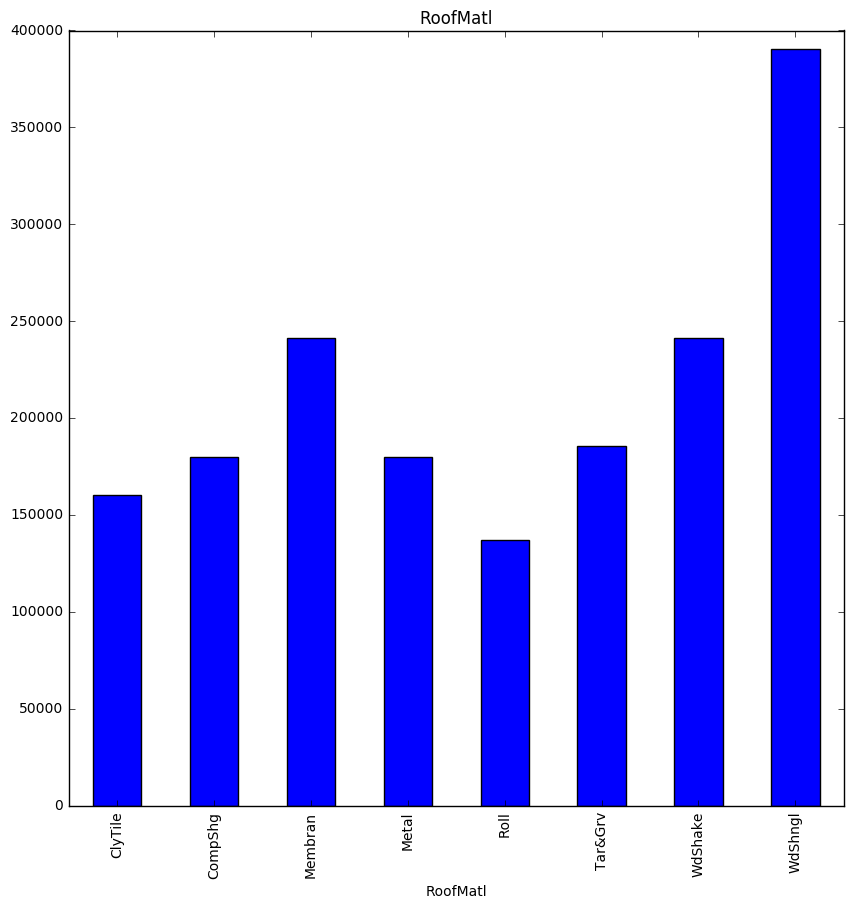

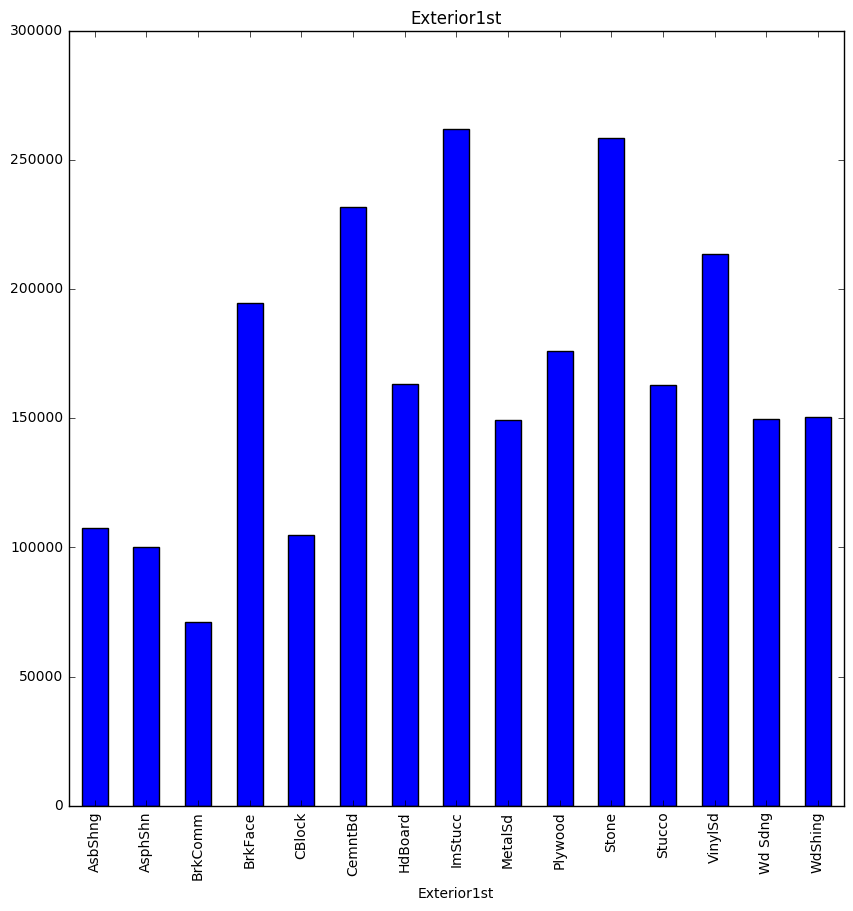

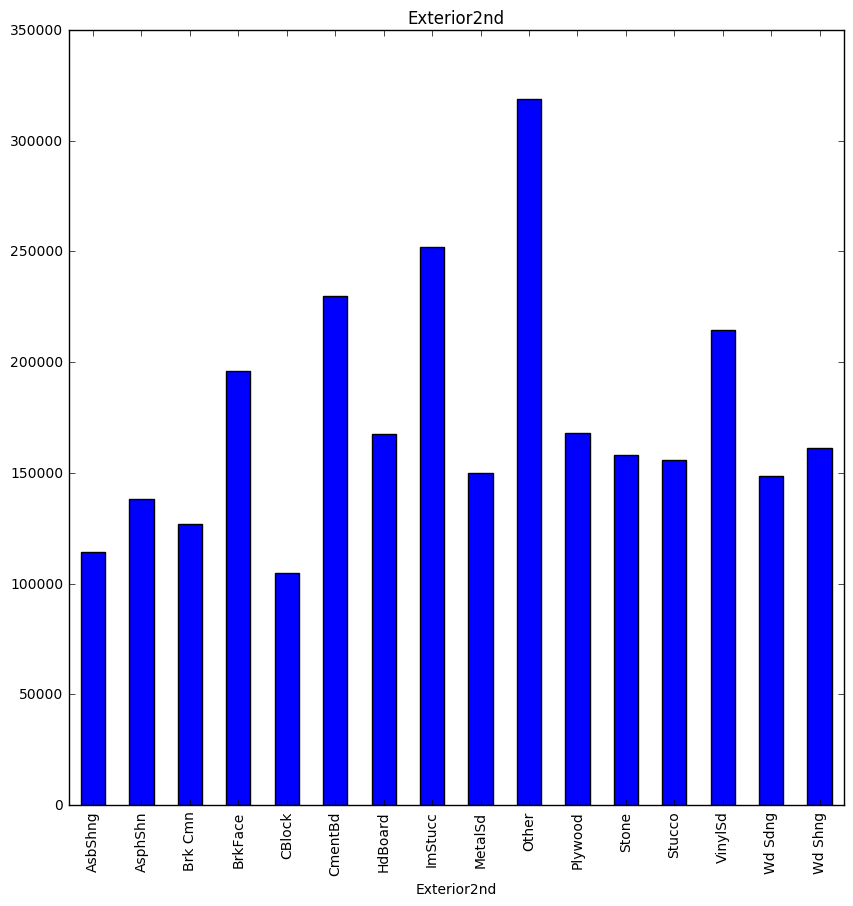

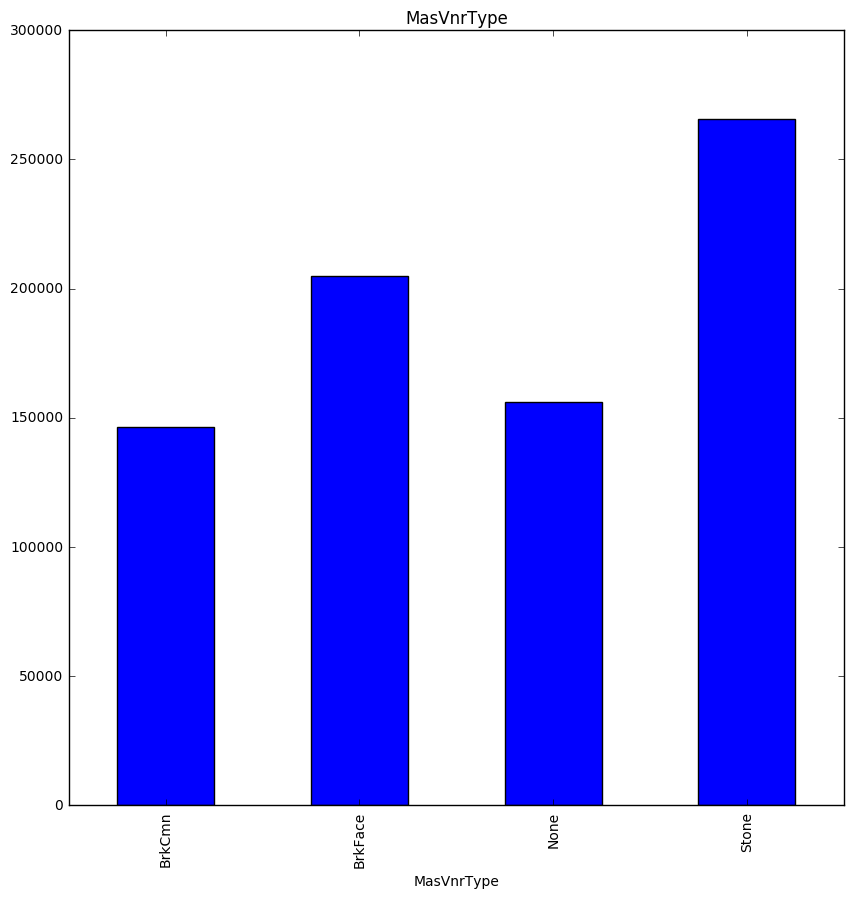

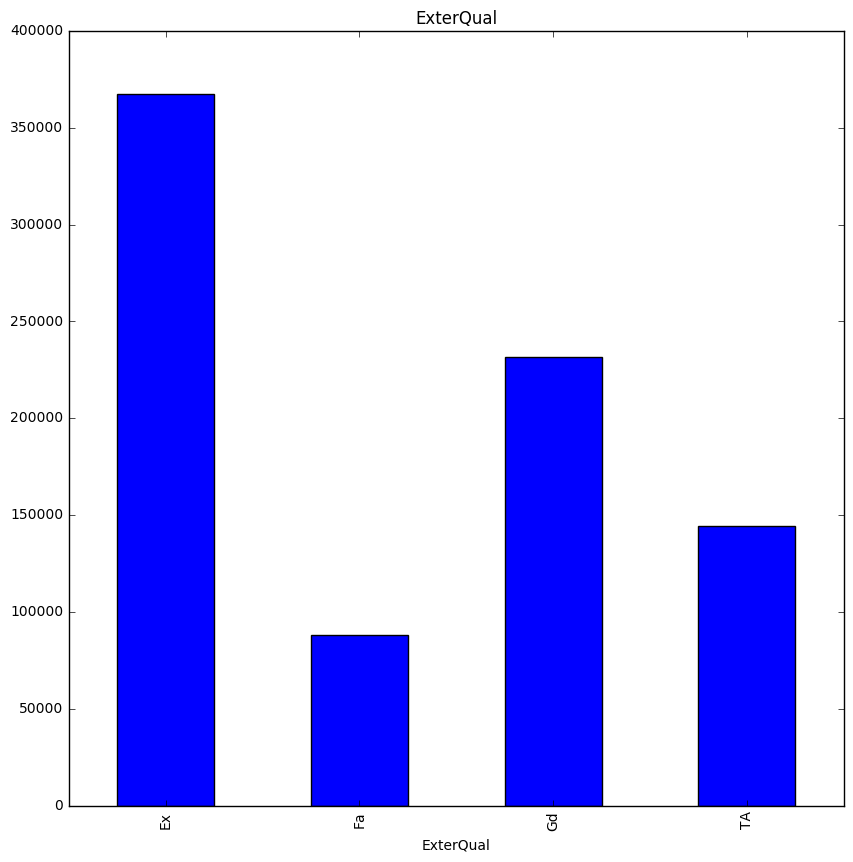

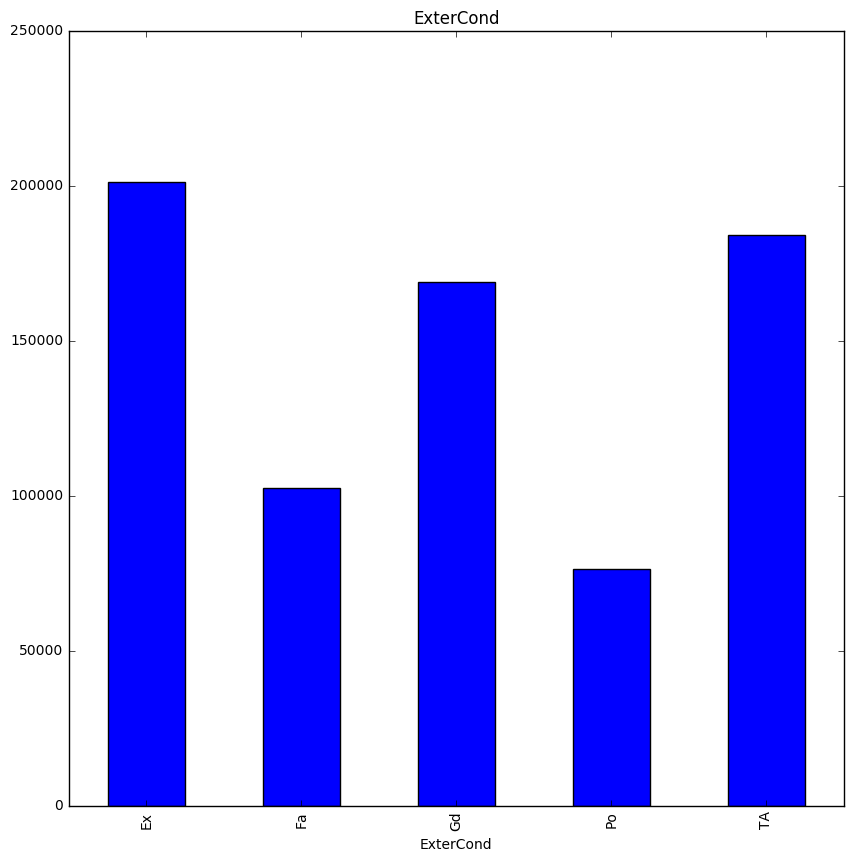

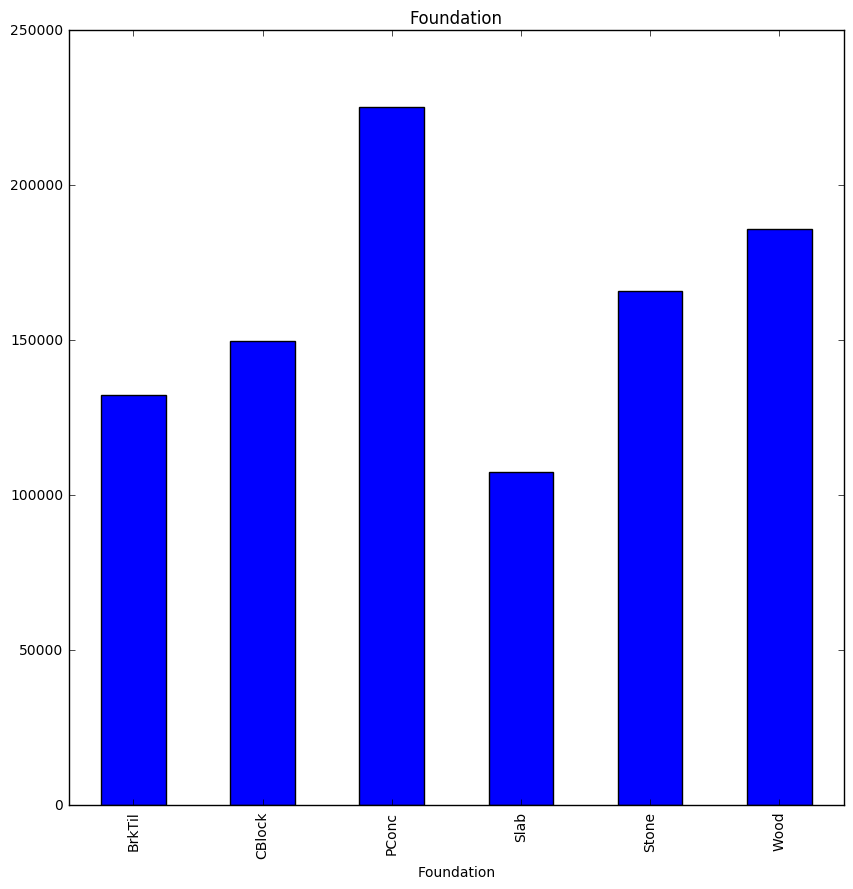

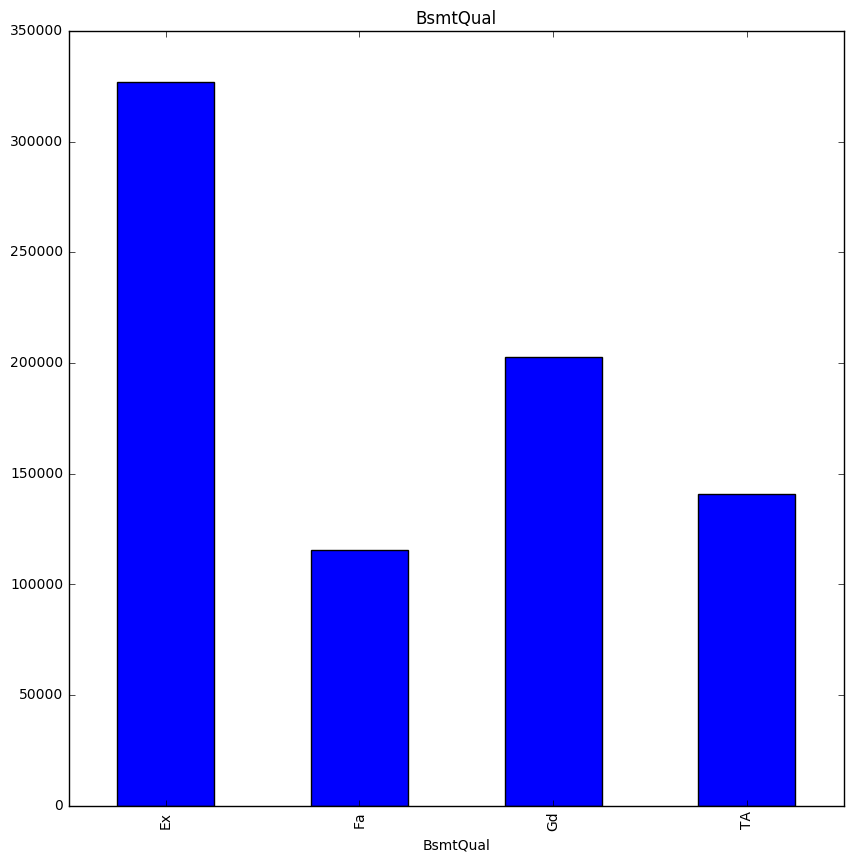

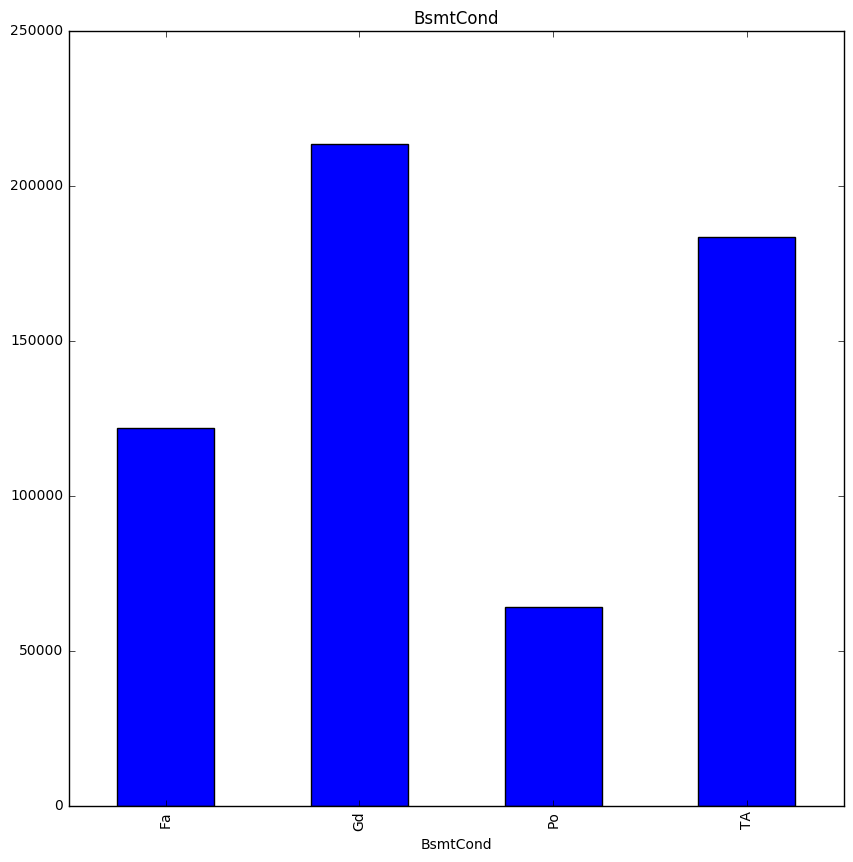

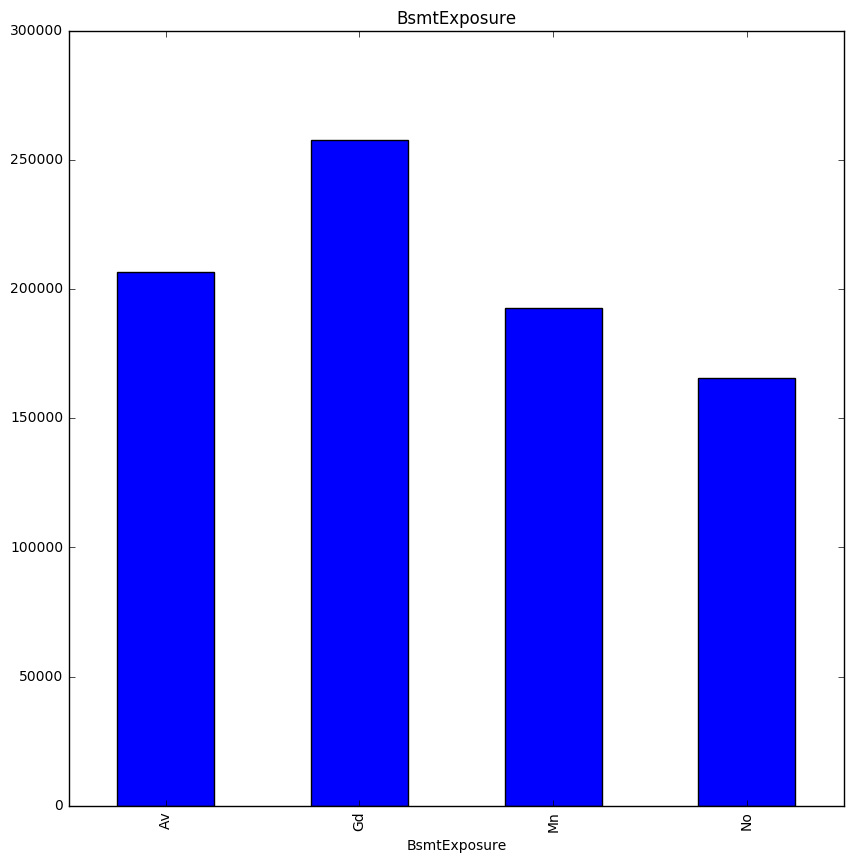

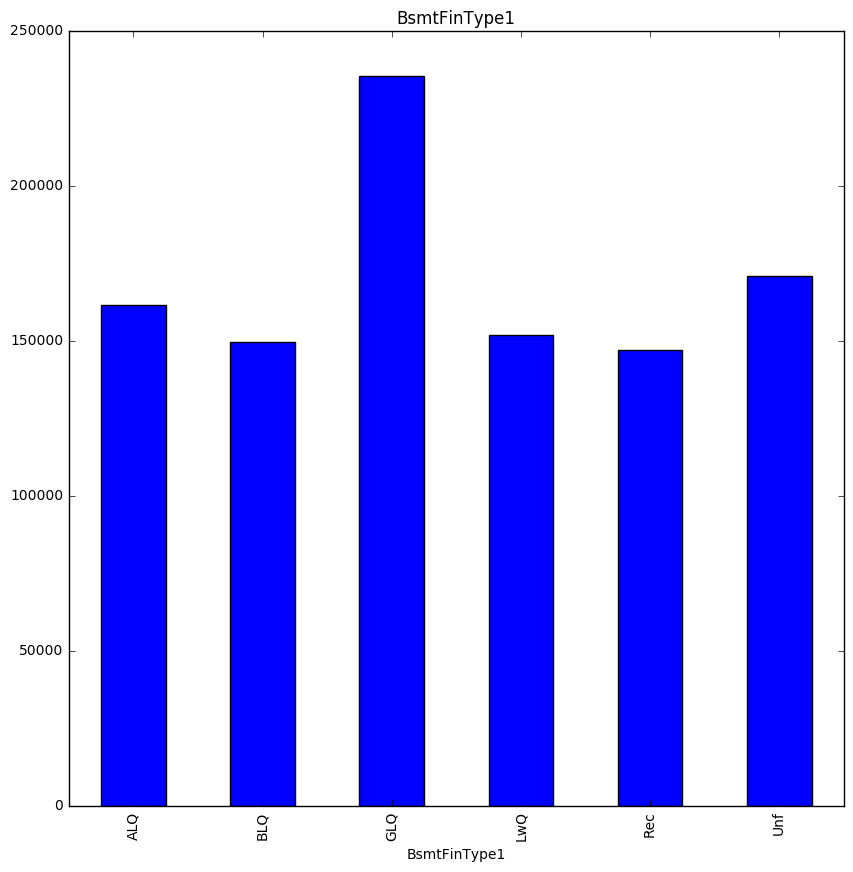

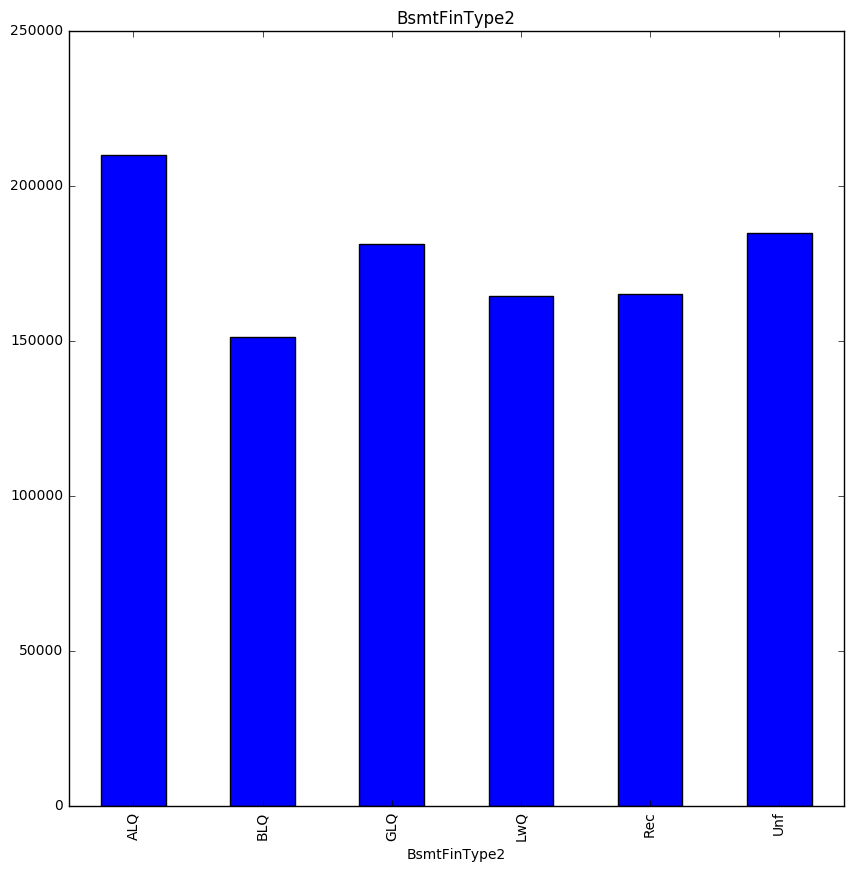

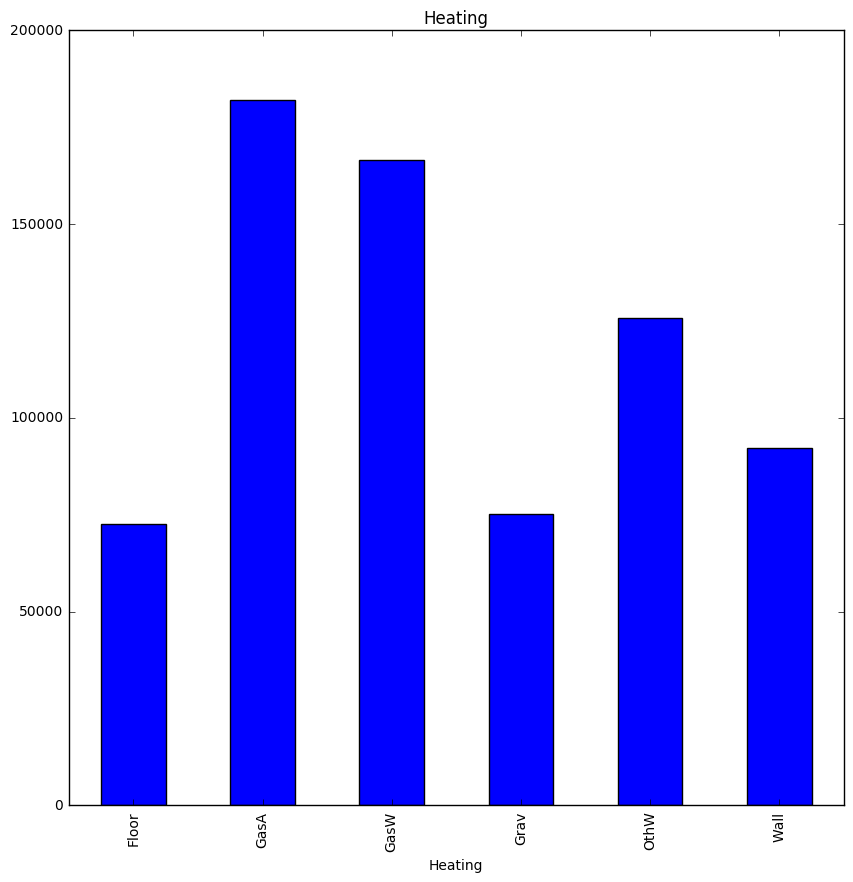

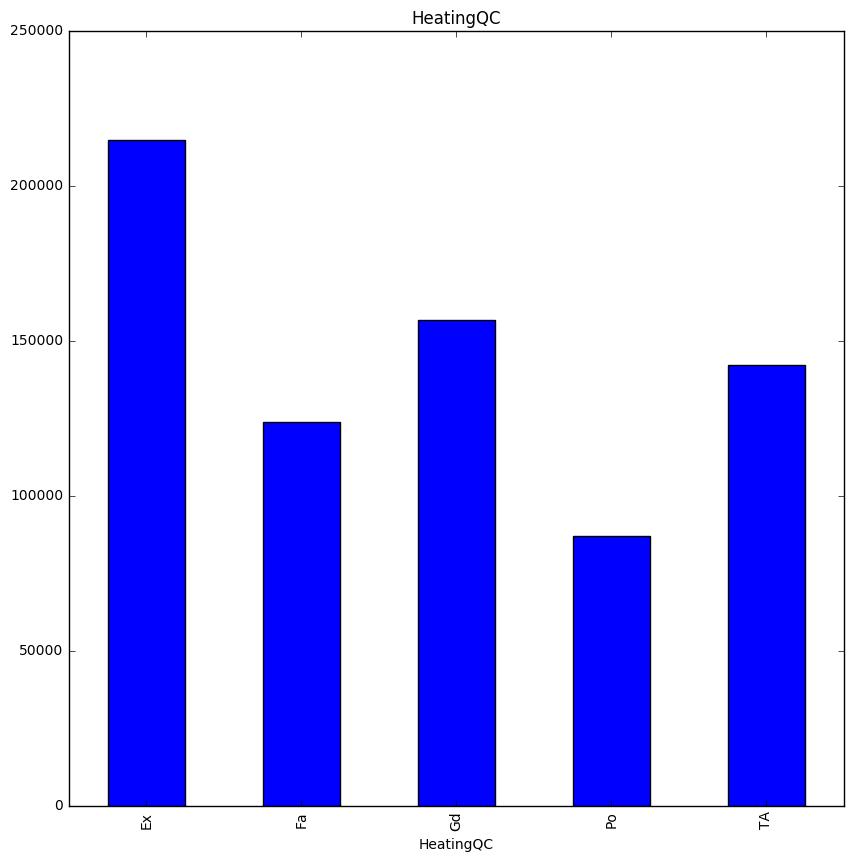

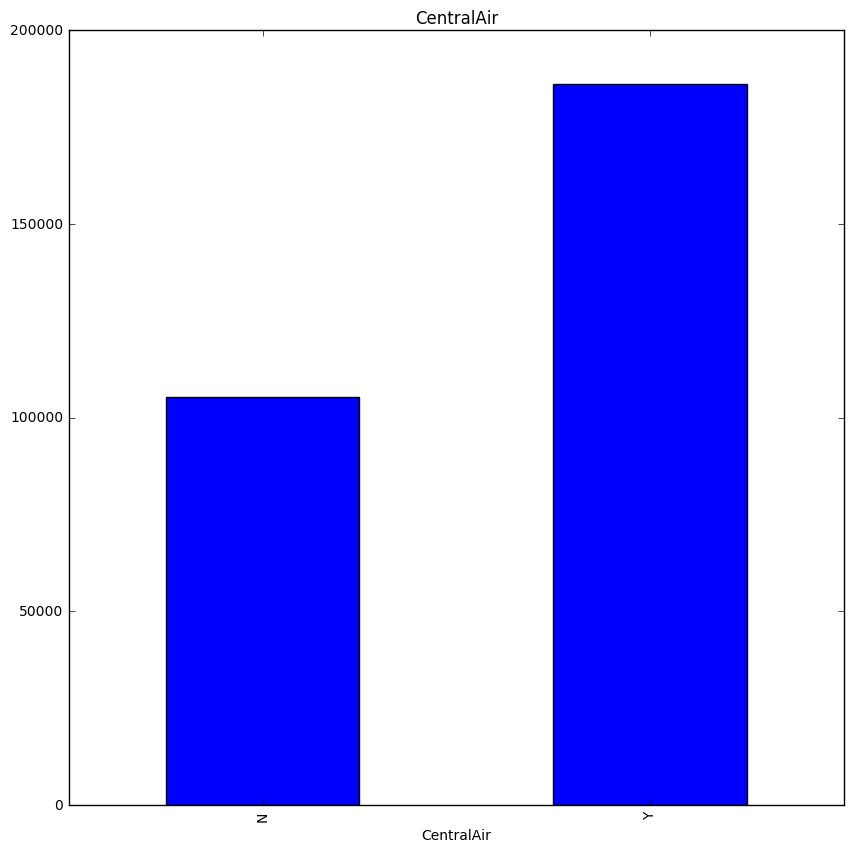

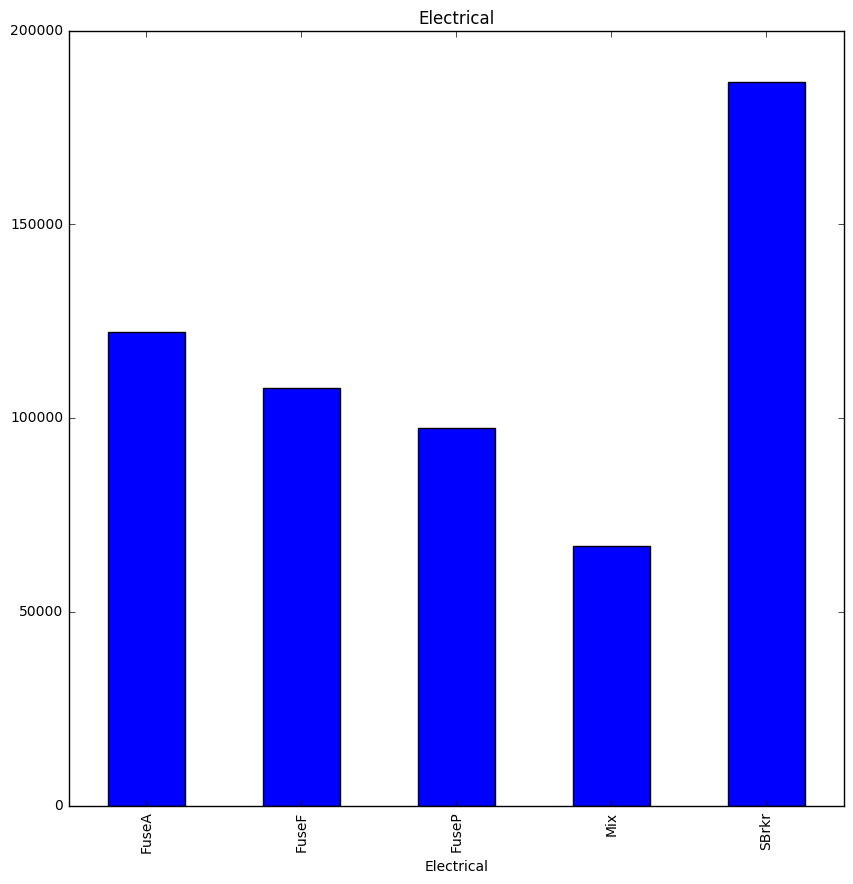

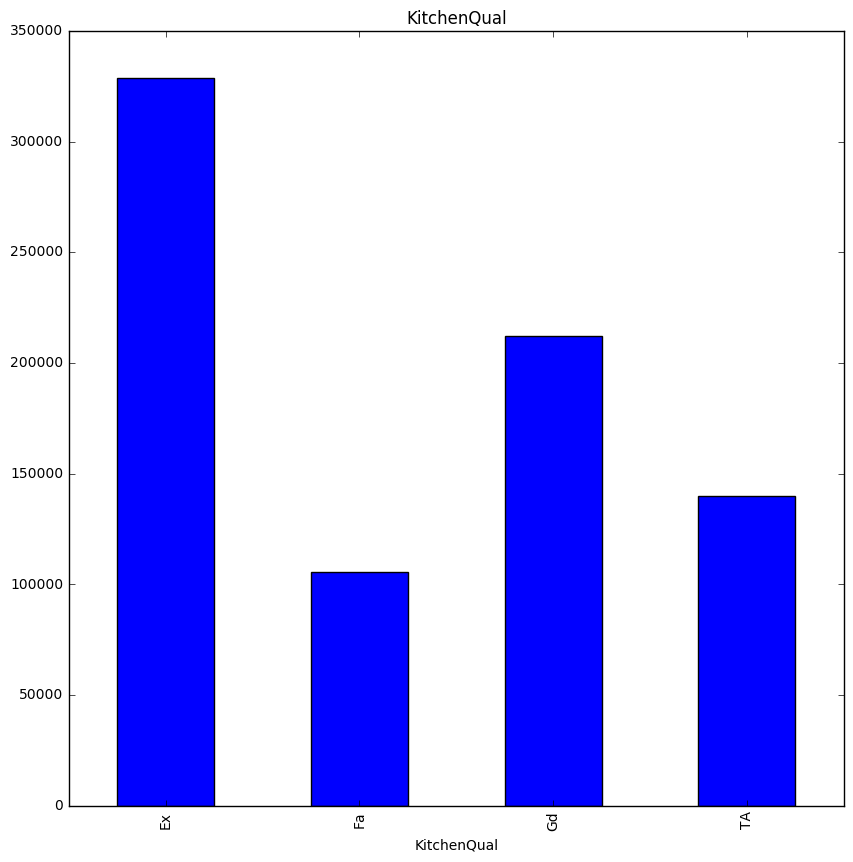

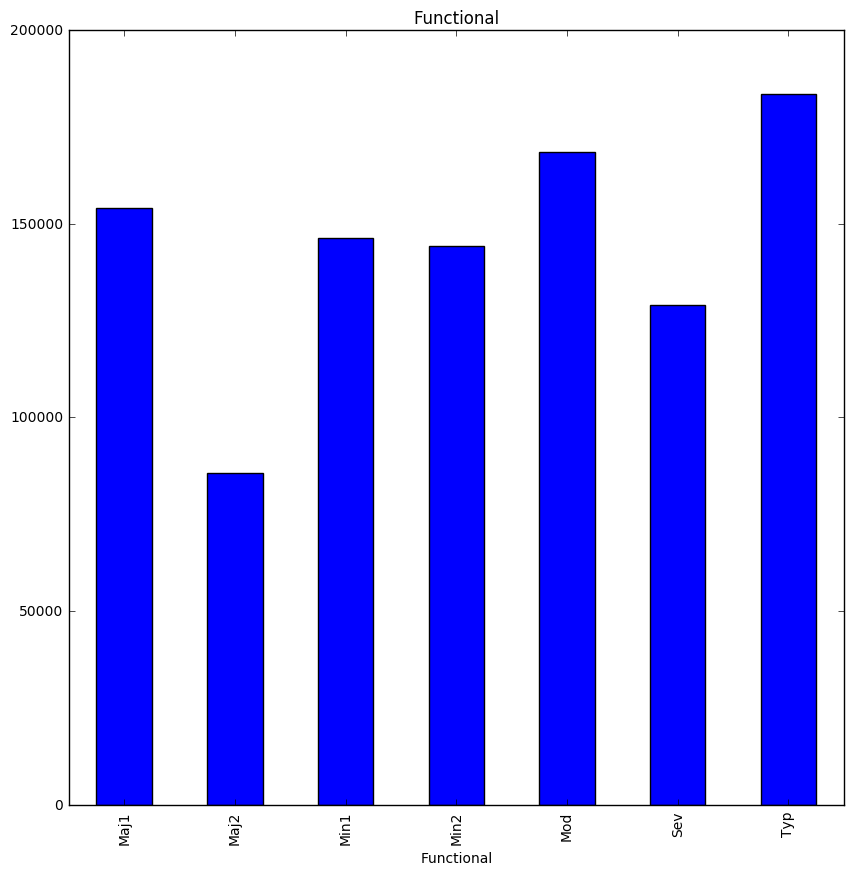

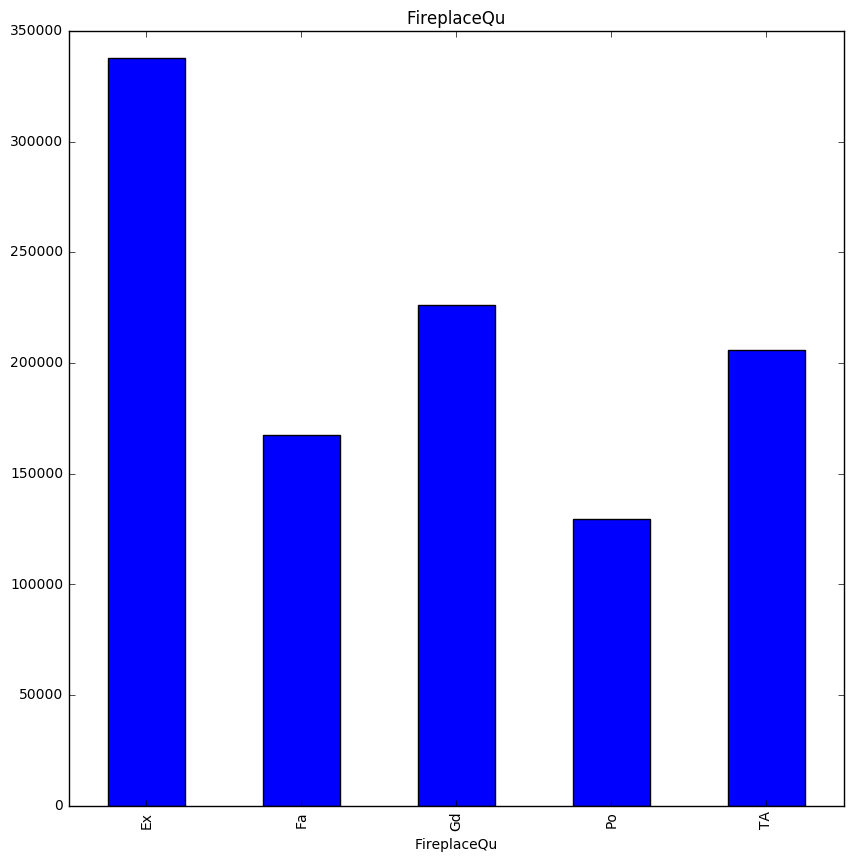

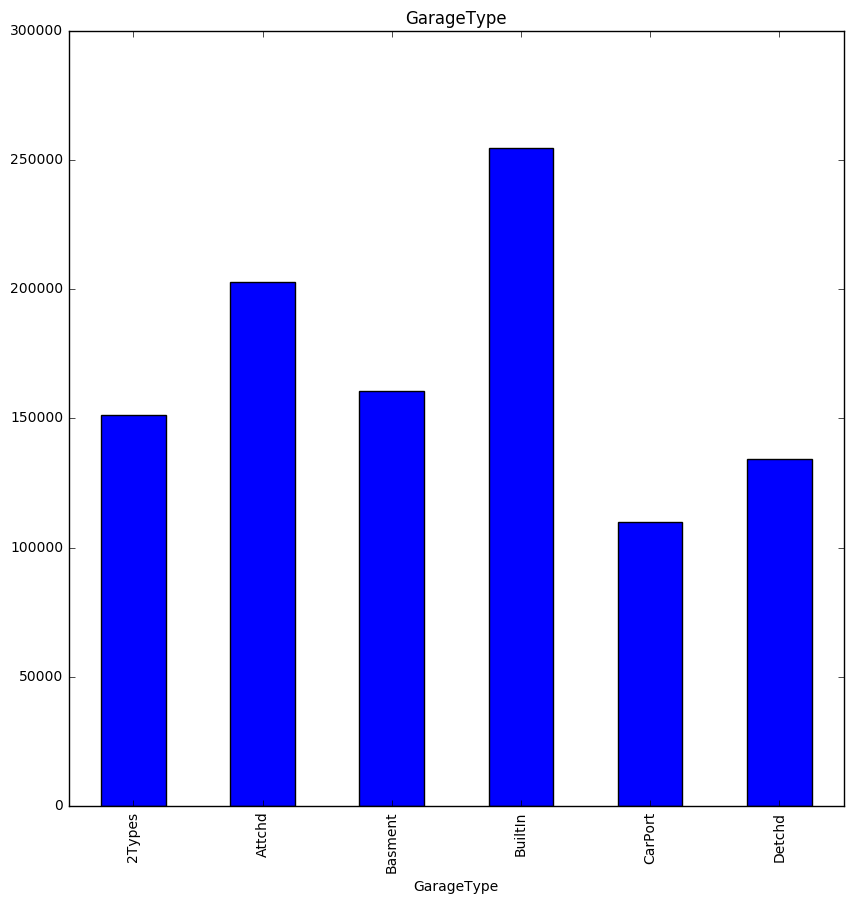

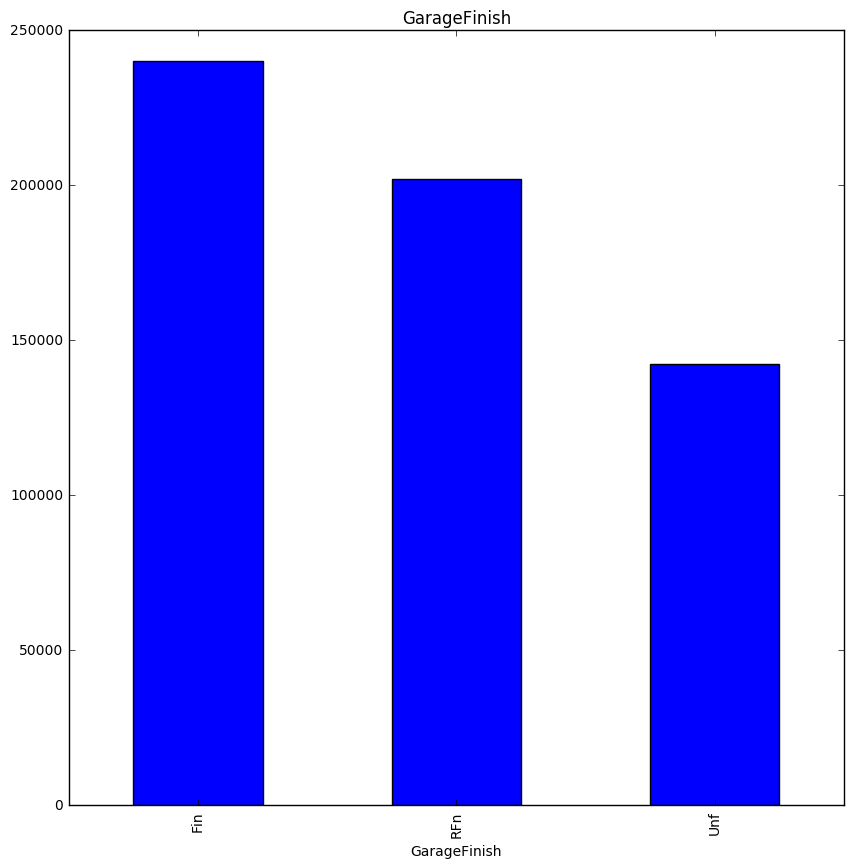

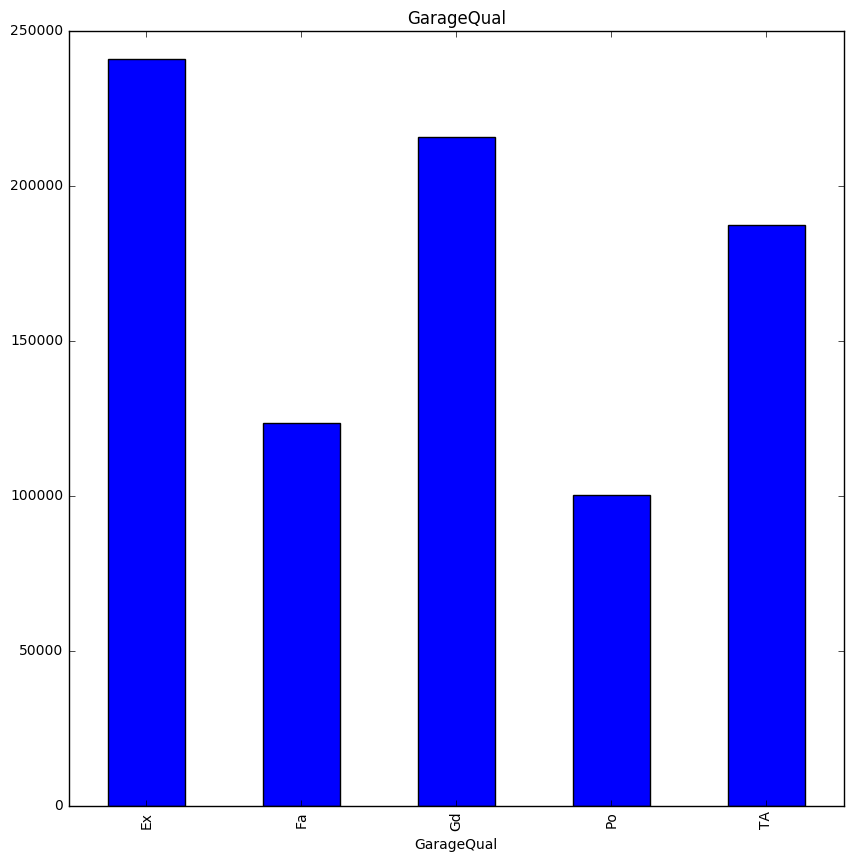

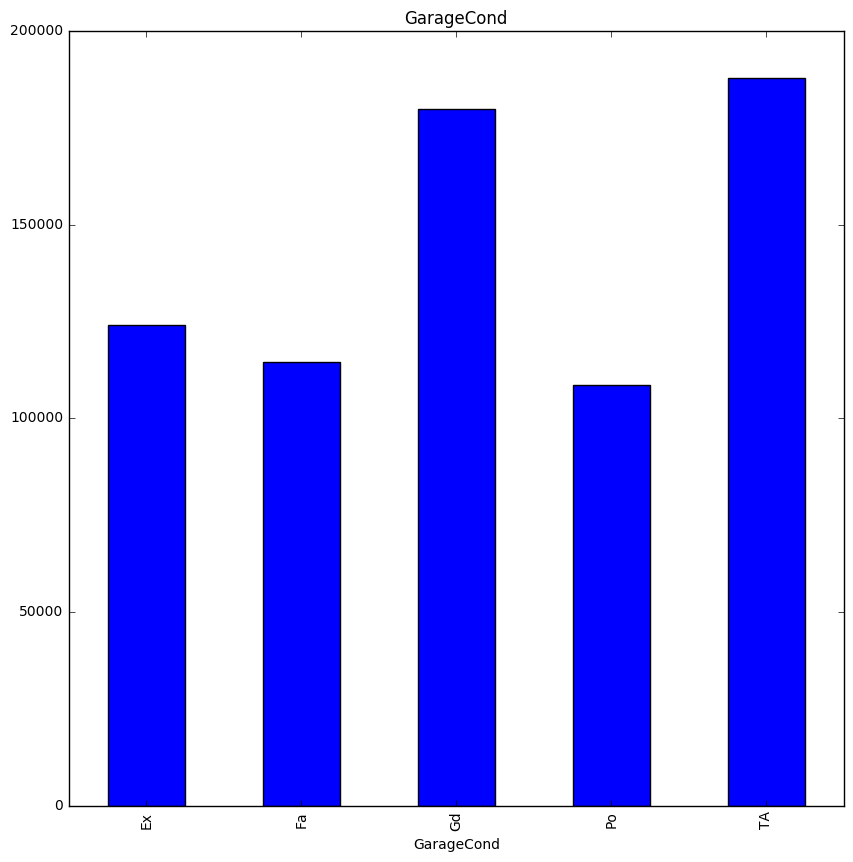

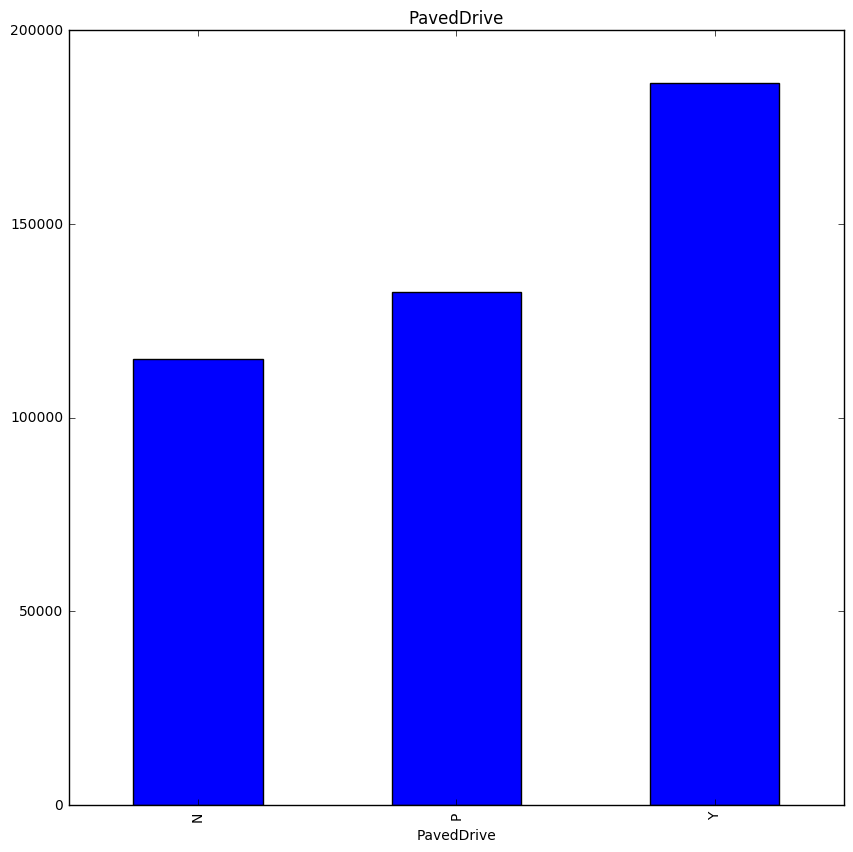

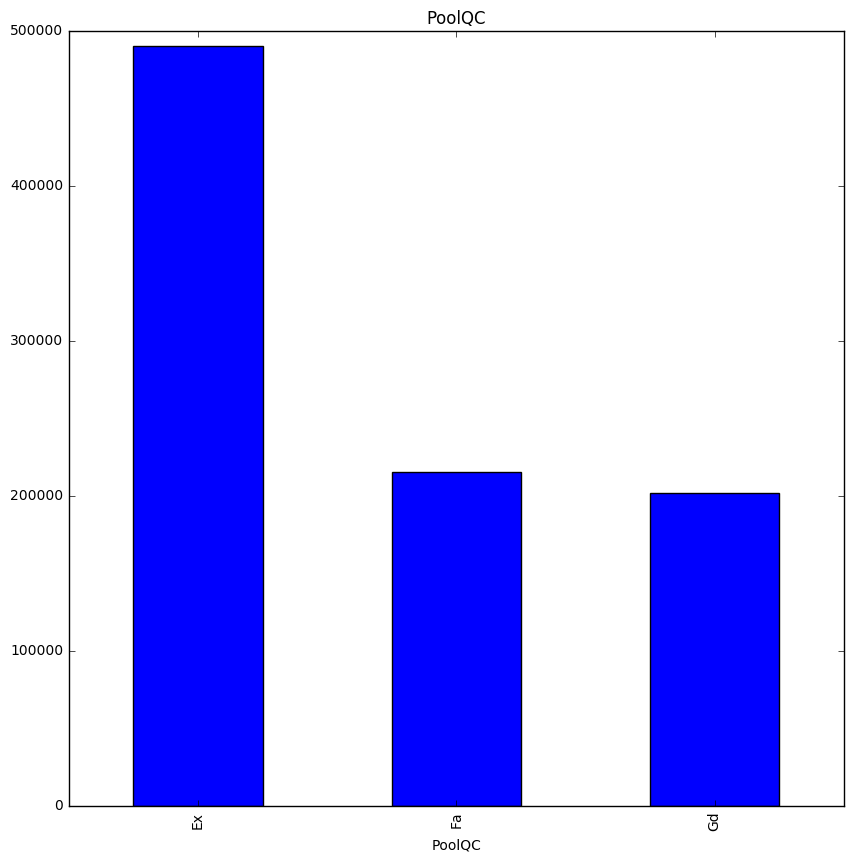

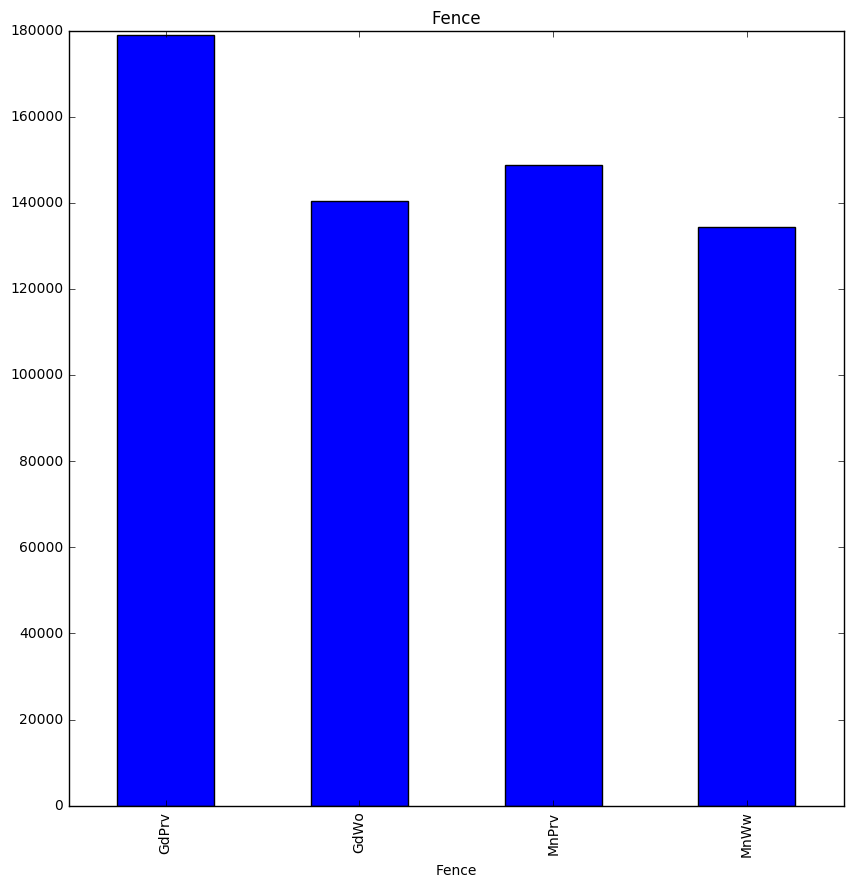

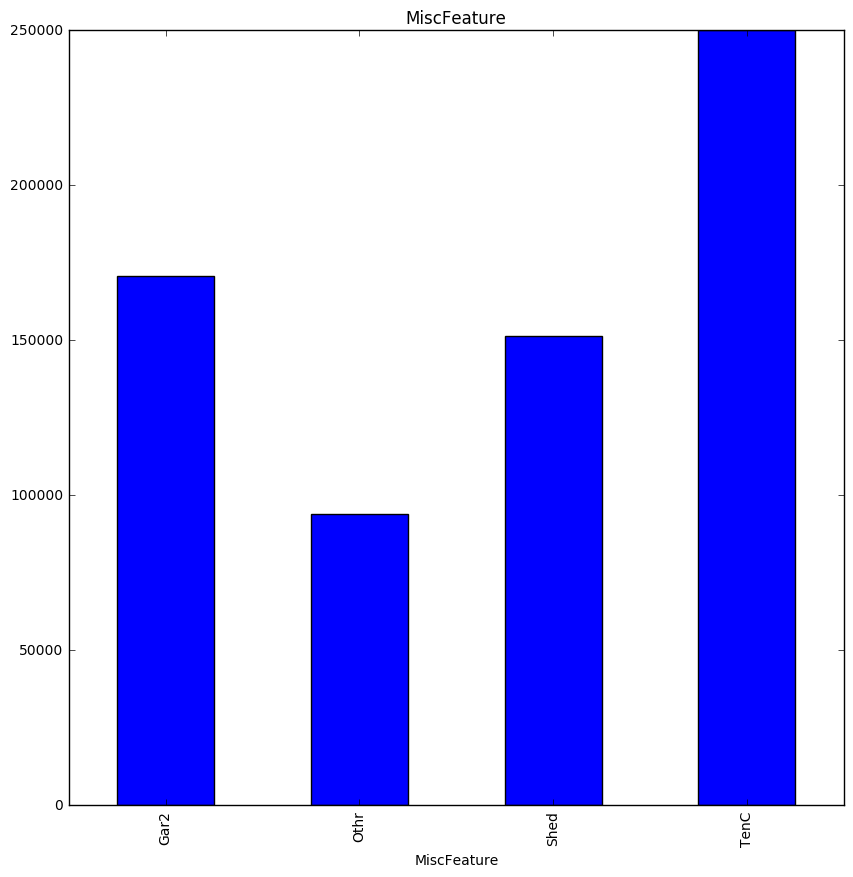

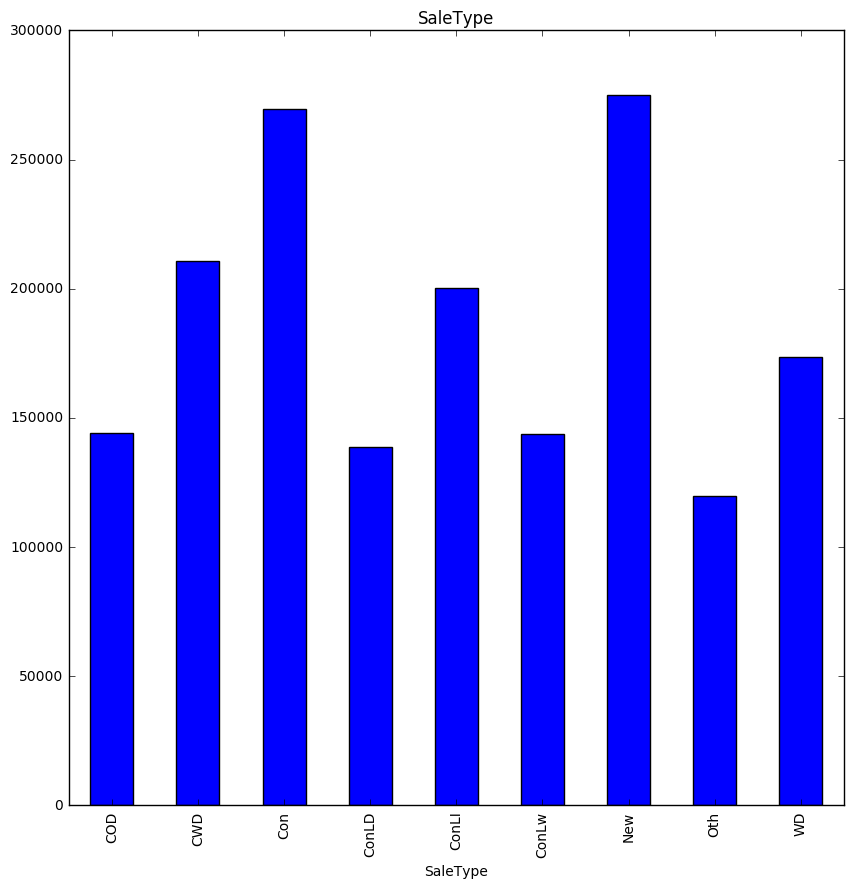

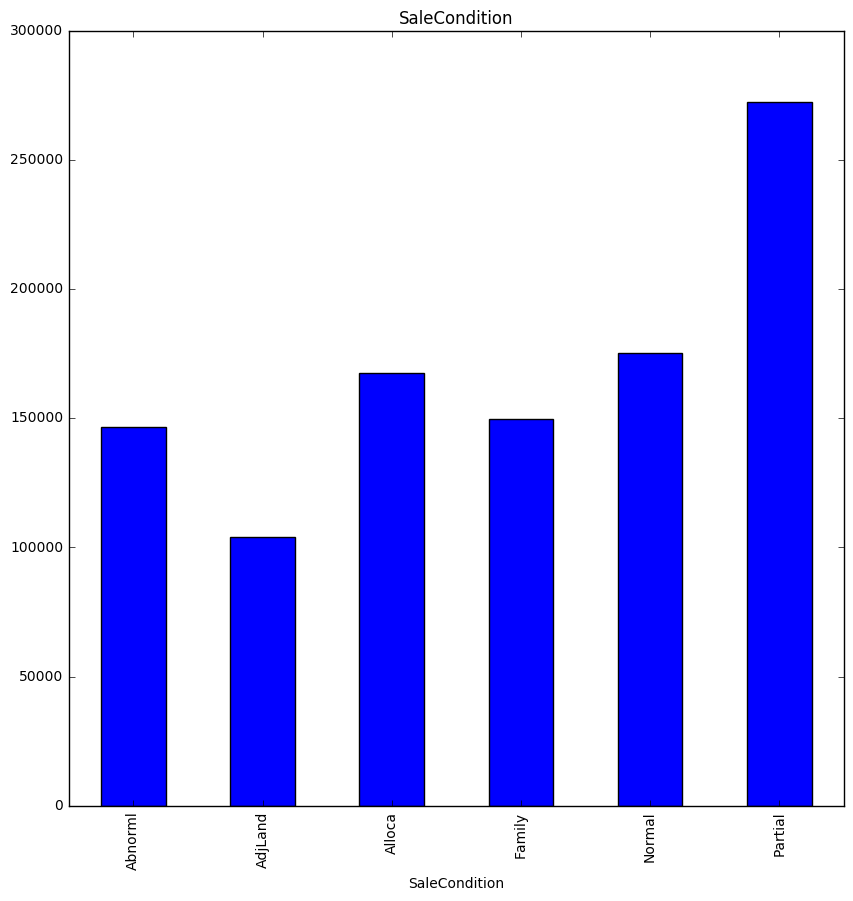

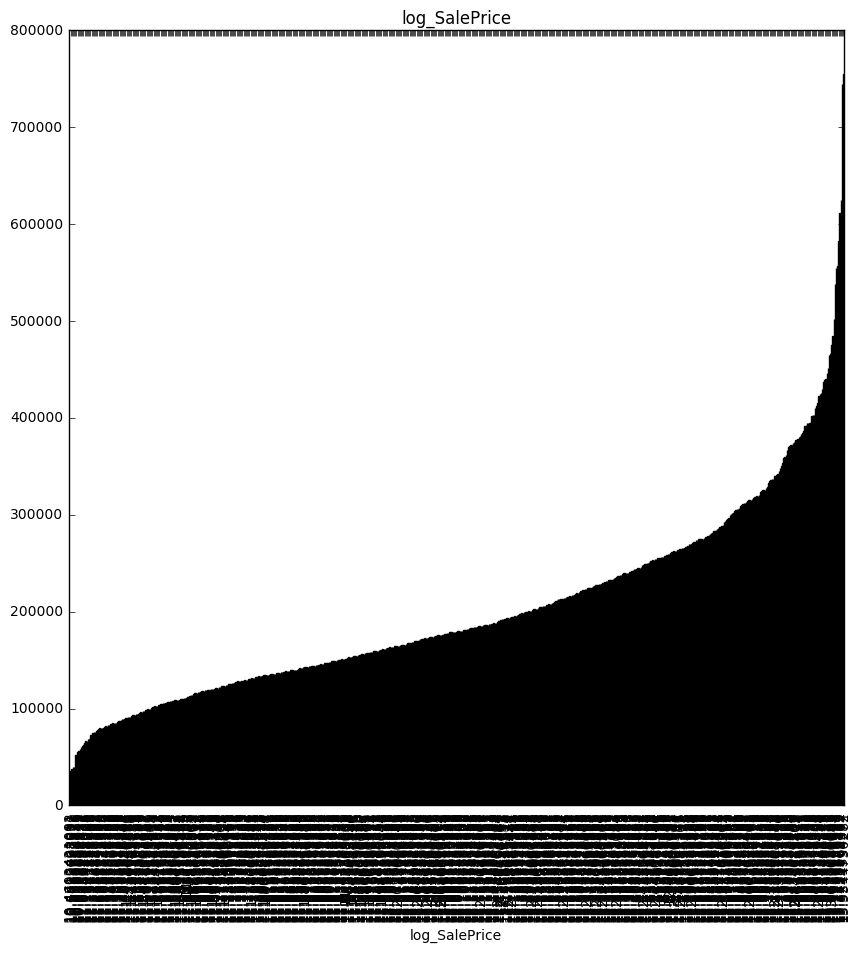

In [22]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('foo.pdf')
for i in range(44):
    col = var_list[i]
    grp = df_train.groupby(col)['SalePrice'].mean()
    pp.savefig(plotGraph(grp, col, df_train))

pp.close()

Now we can measure the relationships between the quantiative variables. First, let's look at a correlation matrix.

In [21]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
quan_vars = df_train.select_dtypes(include = numerics).columns
print "Number of numeric variables: %d" % len(quan_vars)

# Add in the target variable to the list for indexing
var_list = [col for col in df_train.columns if col in quan_vars or col == 'log_SalePrice']
var_list.remove("SalePrice")

Number of numeric variables: 38


In [25]:
quan_df = df_train[var_list]
cor_df = quan_df.corr()

In [24]:
rows, cols = cor_df.shape
flds = list(cor_df.columns)

# Indexing with numbers on a numpy matrix will probably be faster
corr = cor_df.corr().values

for i in range(cols):
    for j in range(i+1, cols):
        if corr[i,j] > 0.7:
            print flds[i], ' ', flds[j], ' ', corr[i,j]

LotFrontage   1stFlrSF   0.732828645766
OverallQual   YearBuilt   0.844038909124
OverallQual   YearRemodAdd   0.83798210872
OverallQual   MasVnrArea   0.759371118264
OverallQual   TotalBsmtSF   0.746133676868
OverallQual   GrLivArea   0.750518881308
OverallQual   FullBath   0.834960438314
OverallQual   GarageYrBlt   0.83370992932
OverallQual   GarageCars   0.903197813754
OverallQual   GarageArea   0.878980833539
OverallQual   log_SalePrice   0.969279636645
YearBuilt   YearRemodAdd   0.883288519873
YearBuilt   GarageYrBlt   0.974036058849
YearBuilt   GarageCars   0.846409986002
YearBuilt   GarageArea   0.816073402634
YearBuilt   log_SalePrice   0.816131261056
YearRemodAdd   FullBath   0.705091693321
YearRemodAdd   GarageYrBlt   0.905385197544
YearRemodAdd   GarageCars   0.770787158113
YearRemodAdd   GarageArea   0.731620012528
YearRemodAdd   log_SalePrice   0.797405753794
MasVnrArea   GarageCars   0.735140901007
MasVnrArea   GarageArea   0.735586627433
MasVnrArea   log_SalePrice   0.770

In [26]:
import seaborn as sns
plt.figure(figsize=(12, 12))
sns.heatmap(cor_df, vmax=1, square=True)

ImportError: No module named seaborn